# Mining For Golden Earrings

In [1]:
import sys
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms.functional import to_pil_image


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from pallets import images as I, models as M, logging as L

In [2]:
all_colors = I.get_punk_colors()
print(f"colors found: {len(all_colors)}")

colors found: 222


## Spot The Yellows

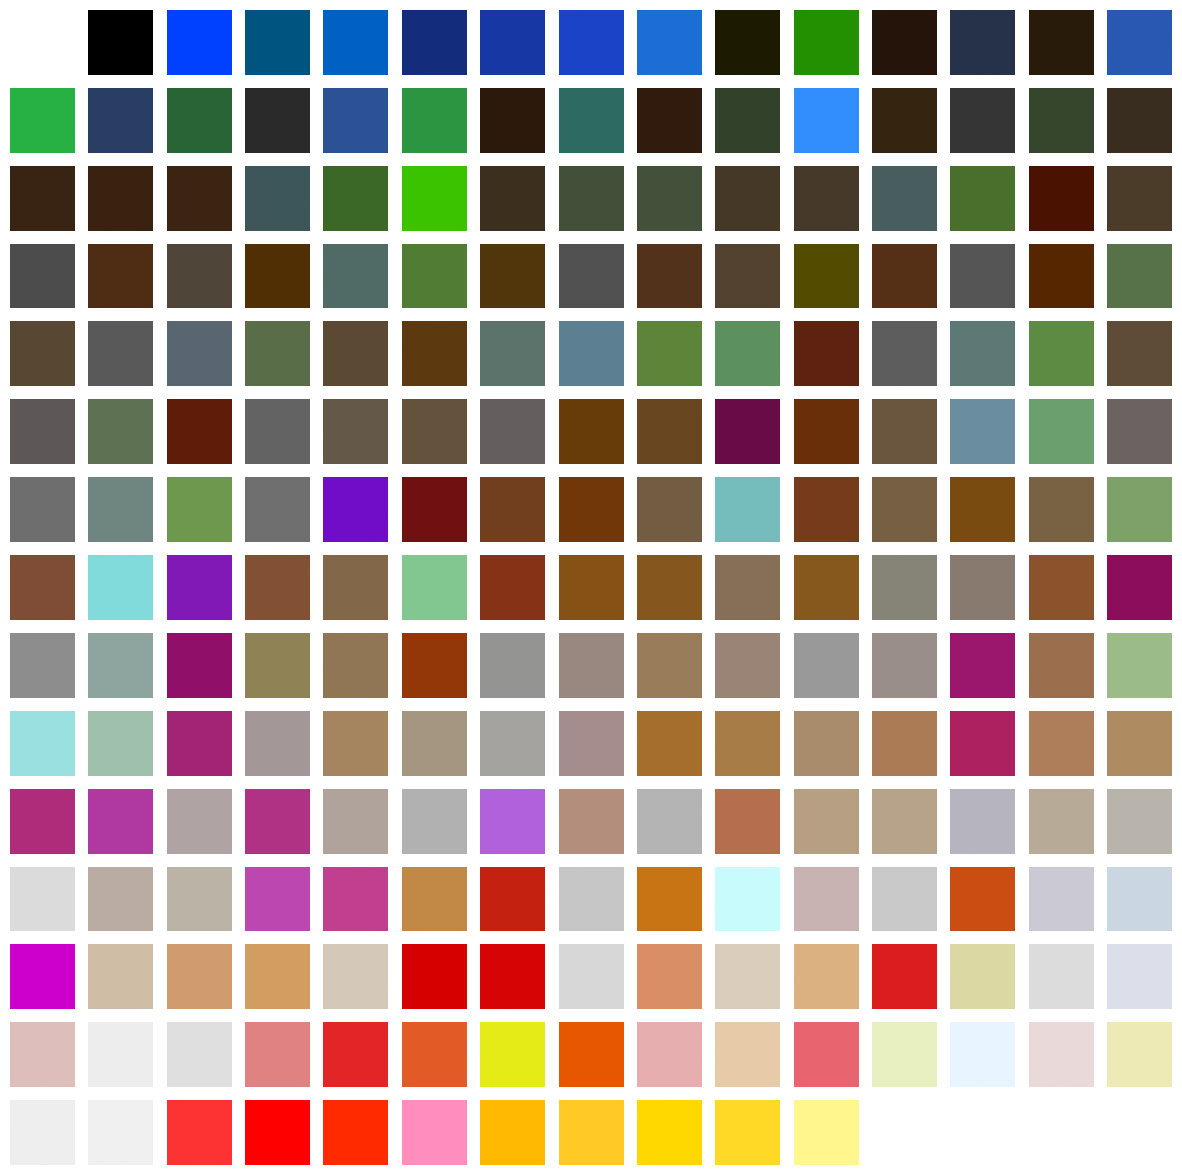

In [3]:
color_imgs = [np.full((24, 24, 4), c) for c in all_colors]
(x,y) = (15,15)
fig = plt.figure(figsize=(x,y))
i = 1
for c in color_imgs:
    fig.add_subplot(x, y, i)
    plt.imshow(c)
    plt.axis('off')
    i=i+1

In [4]:
all_yellows = torch.cat([
    all_colors[201].unsqueeze(0),
    all_colors[216:221],
], 0)

print(all_yellows)


tensor([[0.8941, 0.9216, 0.0902, 1.0000],
        [1.0000, 0.7294, 0.0000, 1.0000],
        [1.0000, 0.7882, 0.1490, 1.0000],
        [1.0000, 0.8471, 0.0000, 1.0000],
        [1.0000, 0.8510, 0.1490, 1.0000],
        [1.0000, 0.9647, 0.5569, 1.0000]])


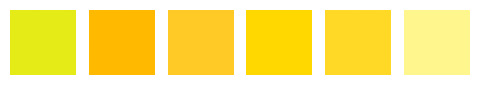

In [5]:
yellow_imgs = [np.full((24,24,4), c) for c in all_yellows]

(x,y) = (10,10)
fig = plt.figure(figsize=(x,y))

for i,c in enumerate(yellow_imgs):
    fig.add_subplot(x, y, i+1)
    plt.imshow(c)
    plt.axis('off')

# Earring Labels

In [6]:
cpunks10k_labels = json.load(open("../../cpunks-10k/cpunks/data/punks.json"))
label_keys = [k for k in cpunks10k_labels["0"].keys()]
label_keys


['alien',
 'ape',
 'zombie',
 'female',
 'male',
 'beanie',
 'choker',
 'pilotHelmet',
 'tiara',
 'orangeSide',
 'buckTeeth',
 'weldingGoggles',
 'pigtails',
 'pinkWithHat',
 'topHat',
 'spots',
 'rosyCheeks',
 'blondeShort',
 'wildWhiteHair',
 'cowboyHat',
 'wildBlonde',
 'straightHairBlonde',
 'bigBeard',
 'redMohawk',
 'halfShaved',
 'blondeBob',
 'vampireHair',
 'clownHairGreen',
 'straightHairDark',
 'straightHair',
 'silverChain',
 'darkHair',
 'purpleHair',
 'goldChain',
 'medicalMask',
 'tassleHat',
 'fedora',
 'policeCap',
 'clownNose',
 'smile',
 'capForward',
 'hoodie',
 'frontBeardDark',
 'frown',
 'purpleEyeShadow',
 'handlebars',
 'blueEyeShadow',
 'greenEyeShadow',
 'vape',
 'frontBeard',
 'chinstrap',
 '3DGlasses',
 'luxuriousBeard',
 'mustache',
 'normalBeardBlack',
 'normalBeard',
 'eyeMask',
 'goat',
 'doRag',
 'shavedHead',
 'muttonchops',
 'peakSpike',
 'pipe',
 'vr',
 'cap',
 'smallShades',
 'clownEyesGreen',
 'clownEyesBlue',
 'headband',
 'crazyHair',
 'knittedC

In [7]:
all_earrings = []
for idx, (_,v) in enumerate(cpunks10k_labels.items()):
    if v['earring'] == 1:
        all_earrings.append(idx)

print(len(all_earrings))

earring_punks = [I.get_punk_tensor(i) for i in all_earrings]


2459


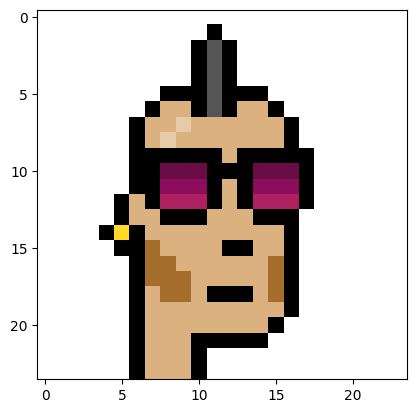

In [8]:
from torchvision.transforms.functional import to_pil_image

p = I.get_punk_tensor(all_earrings[1337])

plt.imshow(to_pil_image(p))
plt.show()

# Finding Yellow Pixels

- following three functions were moved to pallets lib

In [9]:
# def has_yellow(img_colors, yellows):
#     """
#     Checks all colors in img_colors for a match with `all_yellows`
#     """
#     matches = []
#     for c in img_colors:
#         for y in yellows:
#             if (c == y).tolist() == [True, True, True, True]:
#                 matches.append(c)
#     return matches


In [10]:
# def find_yellow_pixels(img, yellows):
#     """
#     Finds every pixel in `img` that is yellow
#     """
#     img = img.reshape(img.shape[0], -1)
#     y_pixels = []
#     for pixel_idx in range(img.shape[1]):
#         pixel = torch.tensor([
#             img[0][pixel_idx],
#             img[1][pixel_idx],
#             img[2][pixel_idx],
#             img[3][pixel_idx],
#         ])
#         coords = (pixel_idx // 24), (pixel_idx % 24)
#         matches = has_yellow(pixel.unsqueeze(0), yellows)
#         if len(matches) > 0:
#             y_pixels.append((coords, matches[0]))
#     return y_pixels


In [11]:
# def map_yellows(punks, yellows):
#     """
#     Finds every yellow pixel in `punks` and keeps tally per pixel coordinates
#     """
#     occurrences = dict()
#     presence  = dict()
#     for p in punks:
#         matches = find_yellow_pixels(p, yellows)
#         for m in matches:
#             coords, yellow = m
#             occurrences[coords] = occurrences.get(coords, 0) + 1
#             presence[coords] = presence.get(coords, []) + [yellow]
#     return occurrences, presence


In [12]:
def plot_occurrences(occurrences):
    heat_map = np.zeros((24,24))
    for k,v in occurrences.items():
        (x,y) = k
        heat_map[x][y] = v
    plt.imshow(heat_map, cmap='hot') #, interpolation='nearest')
    plt.show()

In [13]:
p = I.get_punk_tensor(all_earrings[1337])
I.find_pixels(p, all_yellows)

[((14, 5), tensor([1.0000, 0.8510, 0.1490, 1.0000]))]

## Heatmap for all yellows in labeled punks

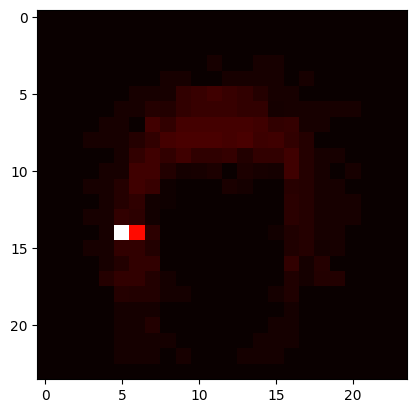

In [14]:
occurrences, presence = I.map_colors(earring_punks, all_yellows)
plot_occurrences(occurrences)

## Heatmaps for each yellow in labeled punks

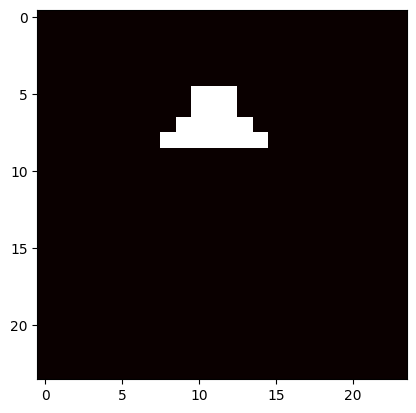

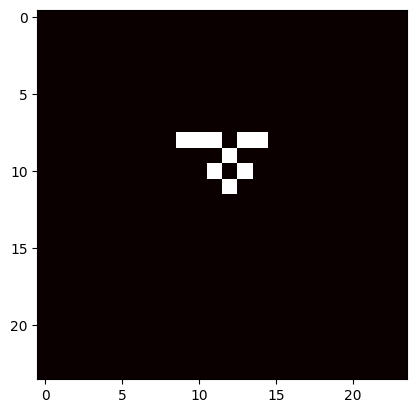

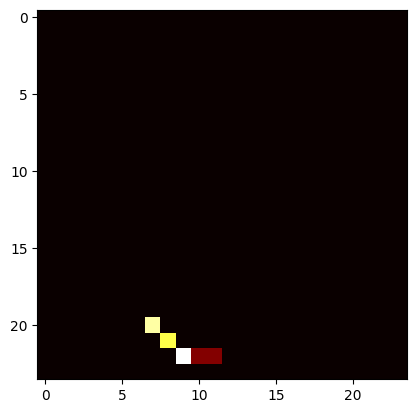

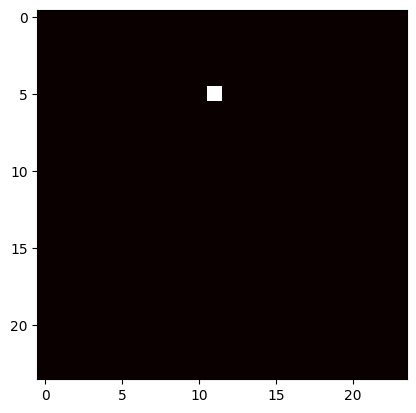

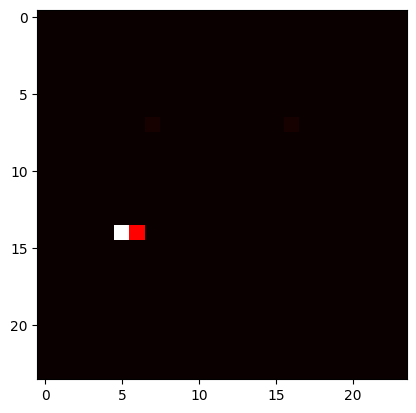

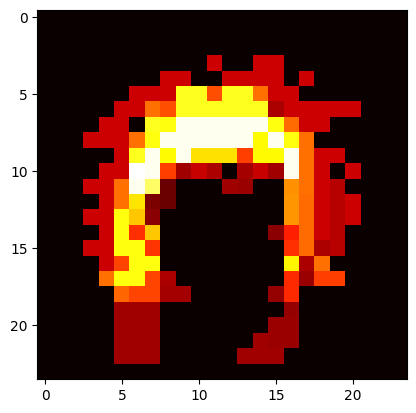

In [15]:
for y in all_yellows:
    occurrences, presence = I.map_colors(earring_punks, [y])
    plot_occurrences(occurrences)

## Heatmaps for each yellow in ALL punks

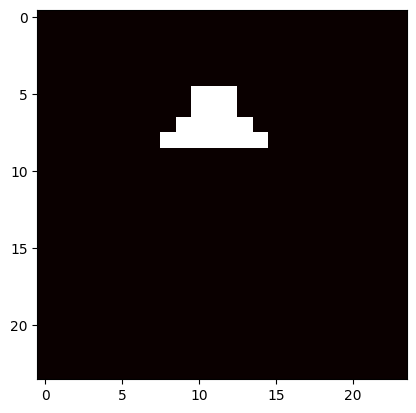

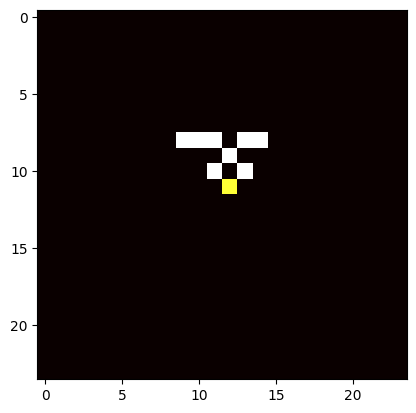

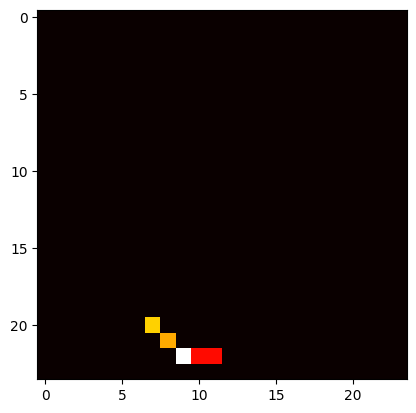

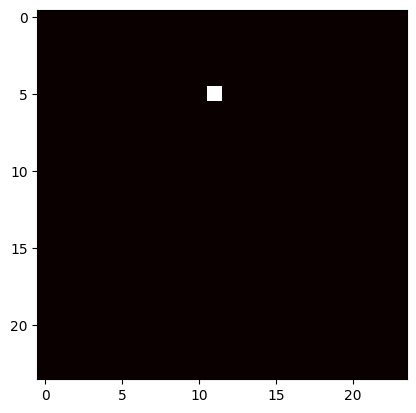

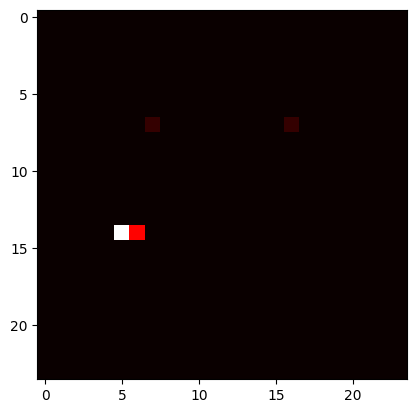

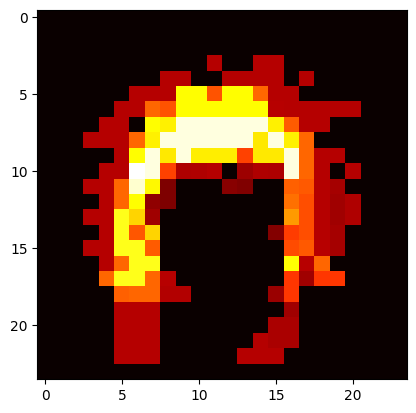

In [16]:
all_punks = [I.get_punk_tensor(i) for i in range(10000)]

for y in all_yellows:
    occurrences, presence = I.map_colors(all_punks, [y])
    plot_occurrences(occurrences)

# Find ALL punks with Earrings

Based on heatmaps, it seems the gold stored in `all_yellows[4]` is consistently used as the color for gold earrings. The label for this is simply 'earring'.

If we find all images with a gold pixel in `(14,5)` or `(14,6)`, we should have all images with earrings.

In [17]:
punks = [(i, I.get_punk_tensor(i)) for i in range(10000)]


In [18]:
earring_gold = all_yellows[4]
print(earring_gold)

earring_matches = []
for idx, p in punks:
    matches = I.find_pixels(p, [earring_gold])
    for m in matches:
        coords, yellow = m
        if coords == (14, 5) or coords == (14, 6):
            earring_matches.append((idx, p))

print(f"Found punks with earrings: {len(earring_matches)}")

tensor([1.0000, 0.8510, 0.1490, 1.0000])
Found punks with earrings: 1976


## Warning

The cell below will plot every face with the right golden pixels, representing the earring. There are 1976 faces, so the output here will be very long.

There are more cells below this huge section.

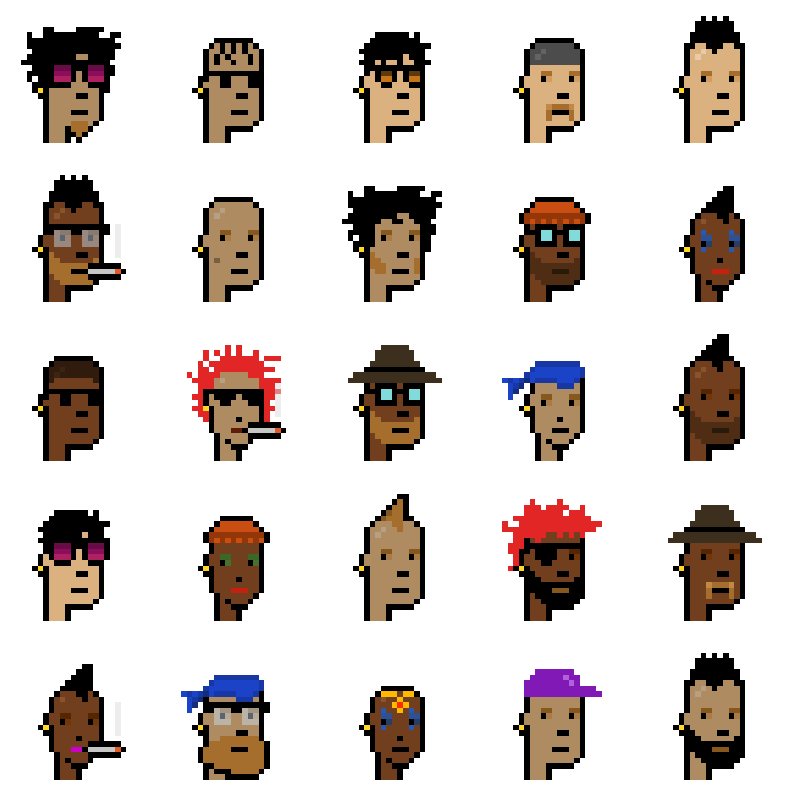

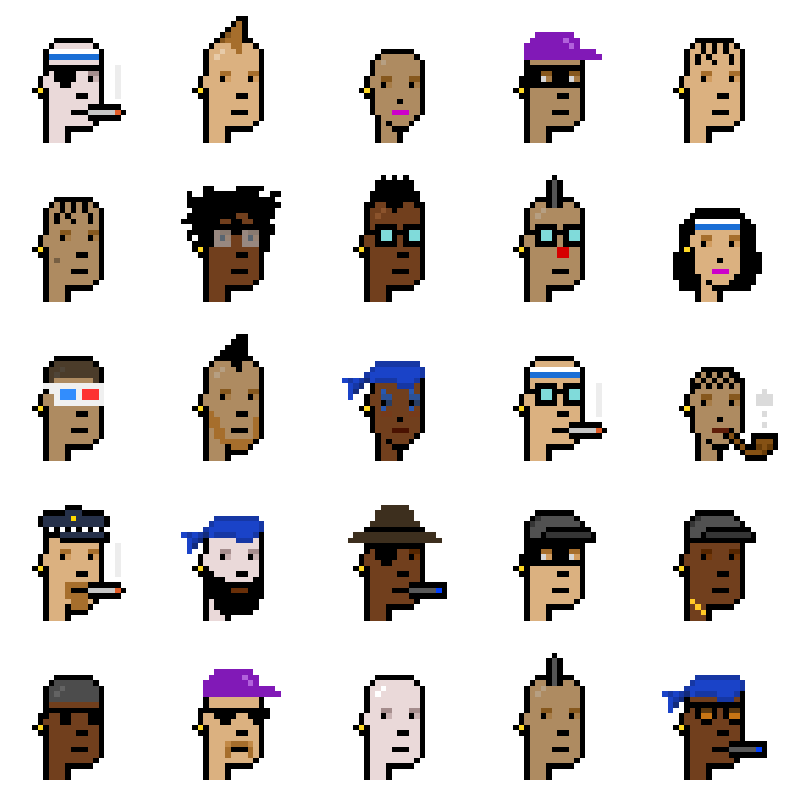

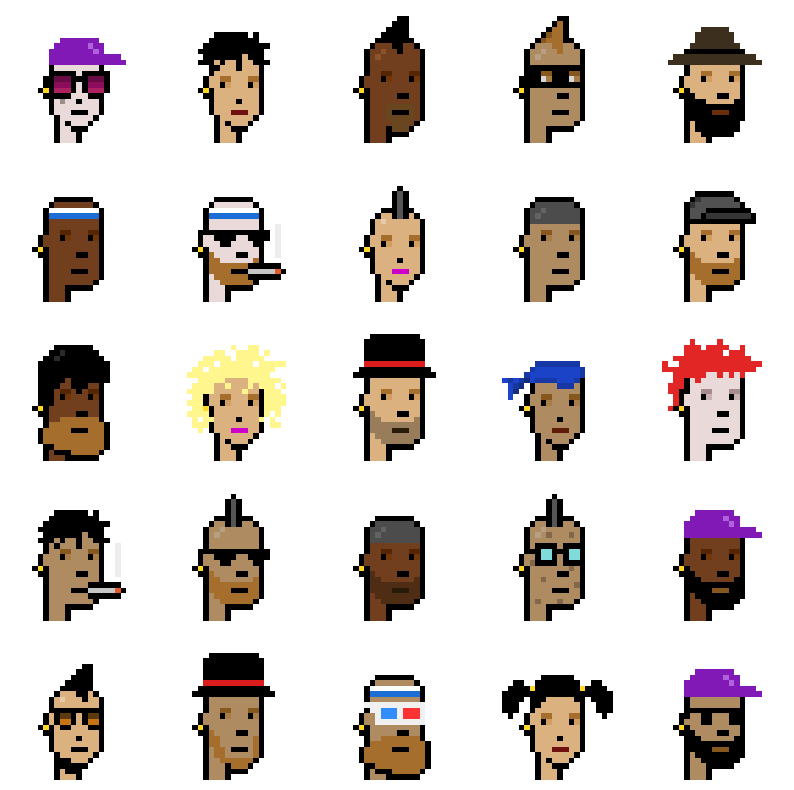

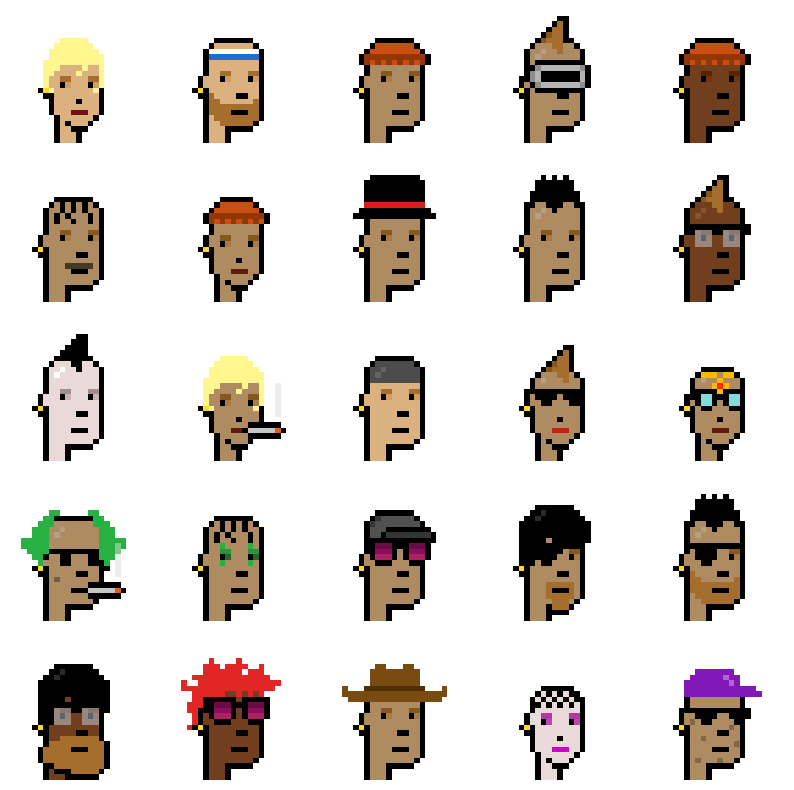

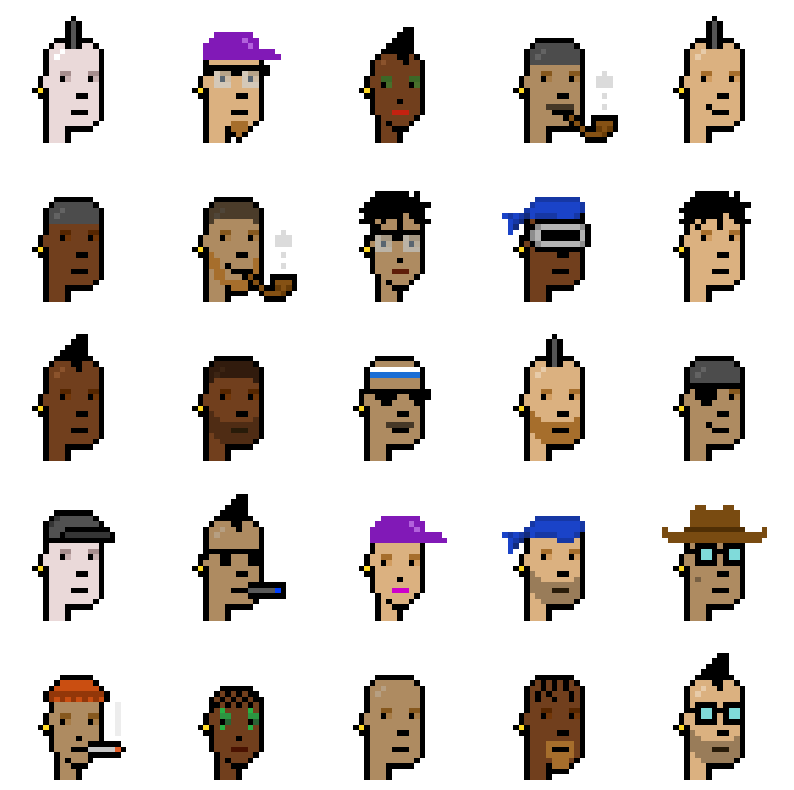

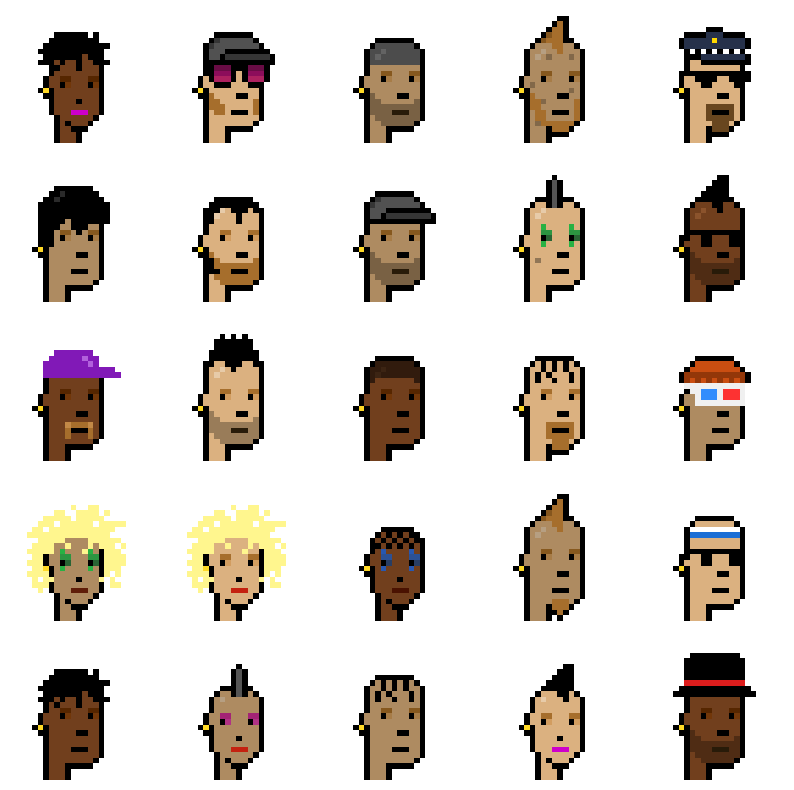

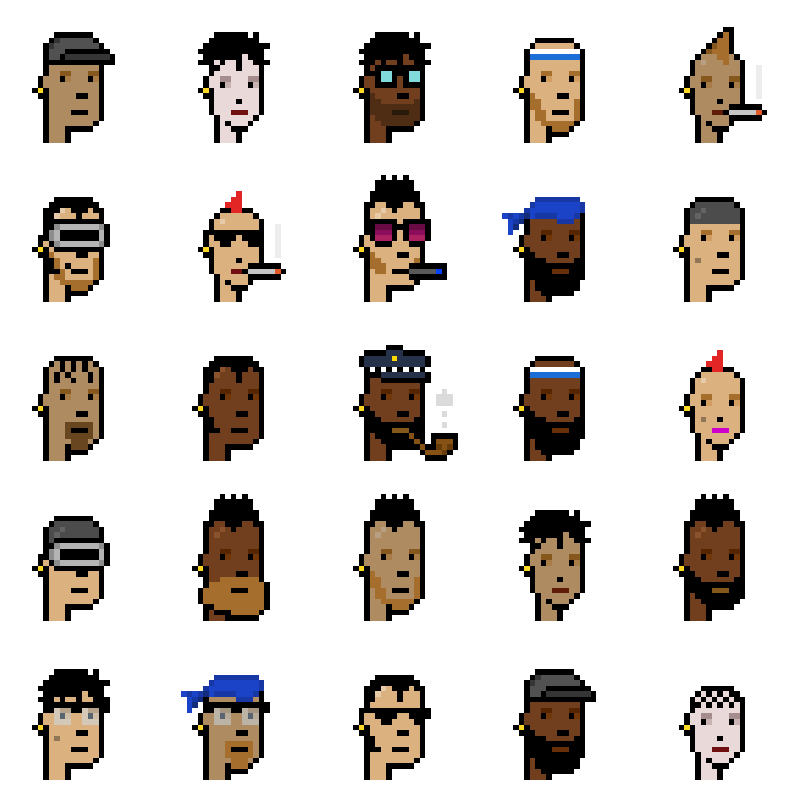

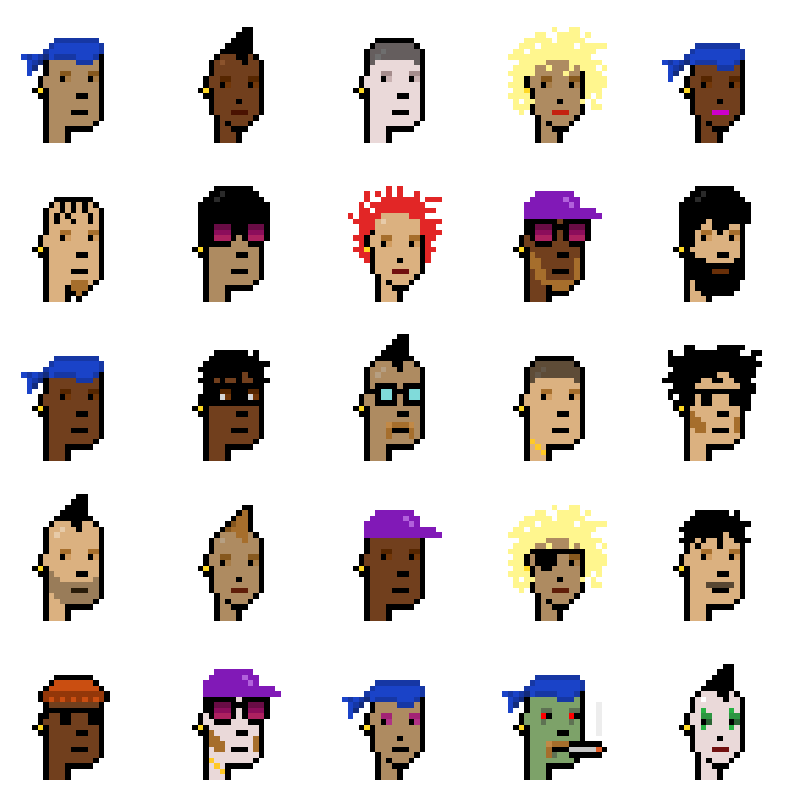

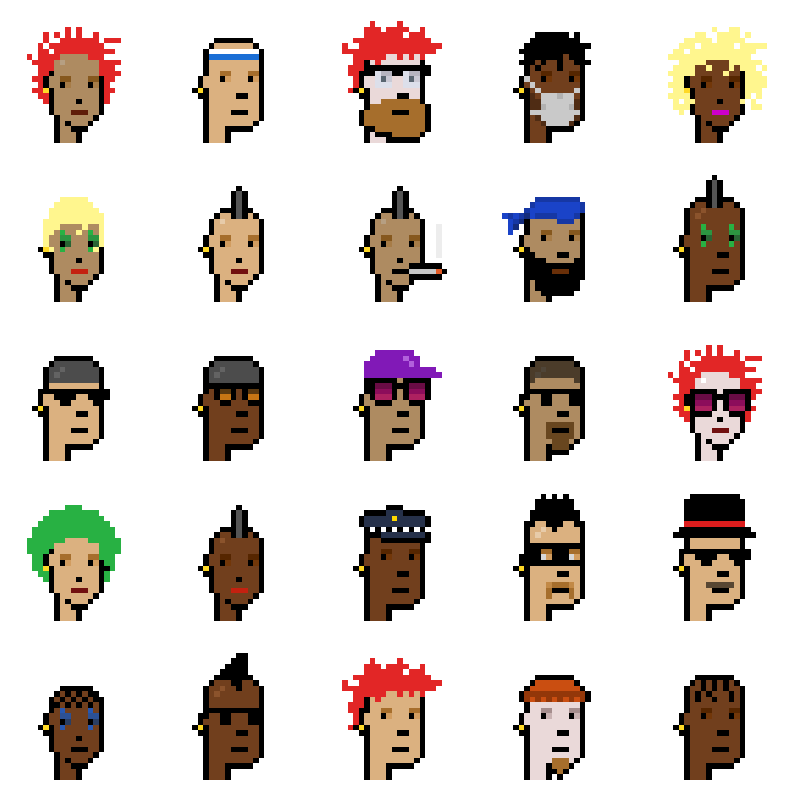

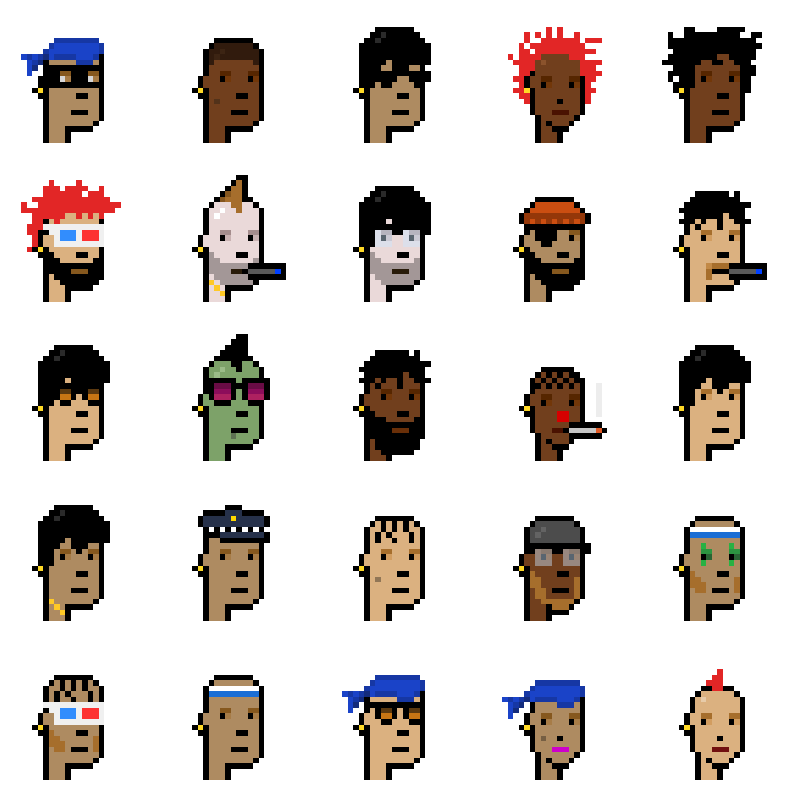

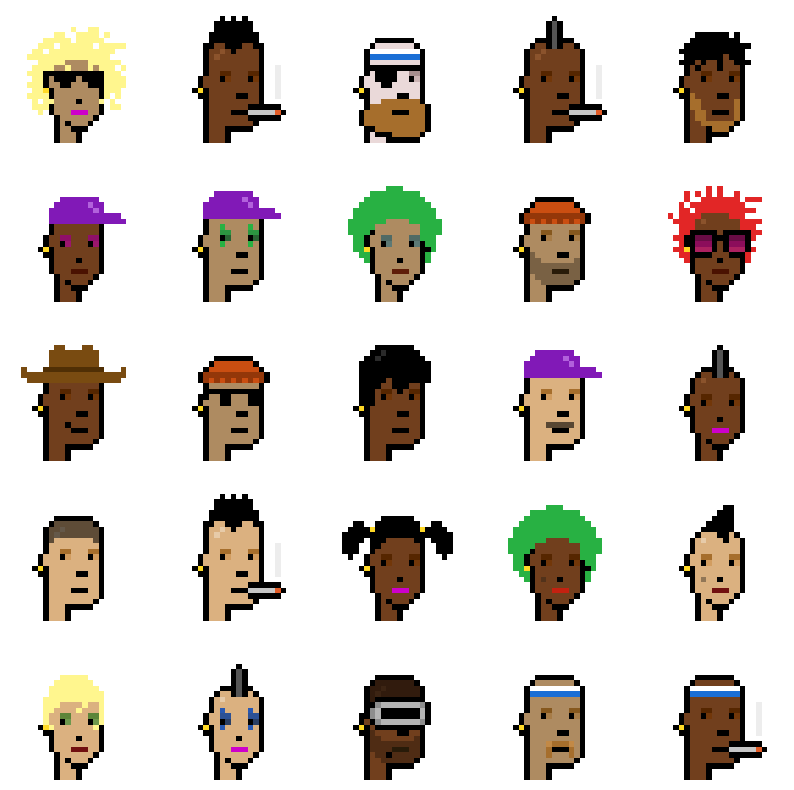

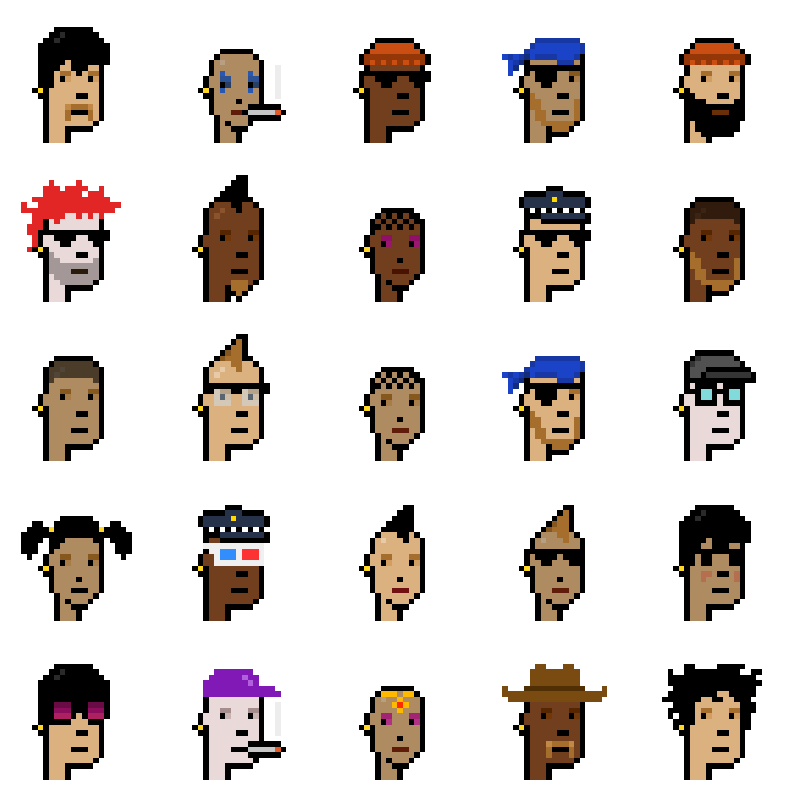

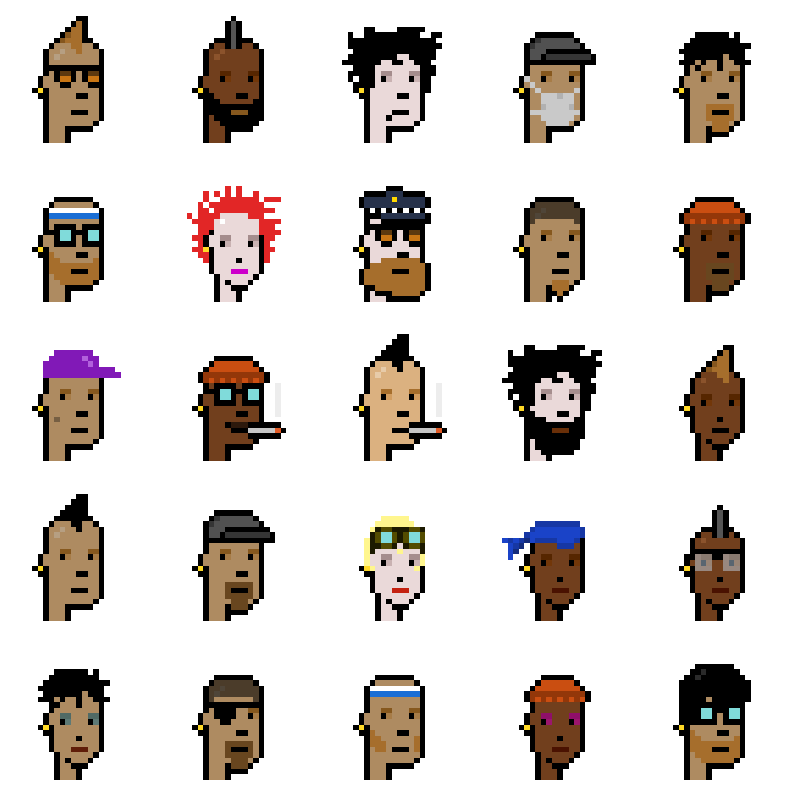

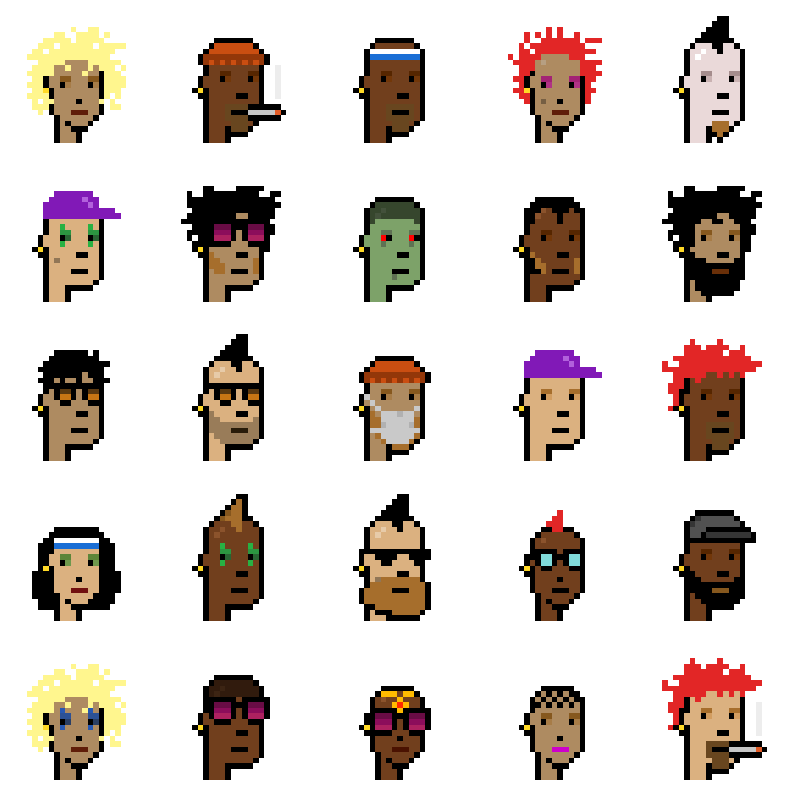

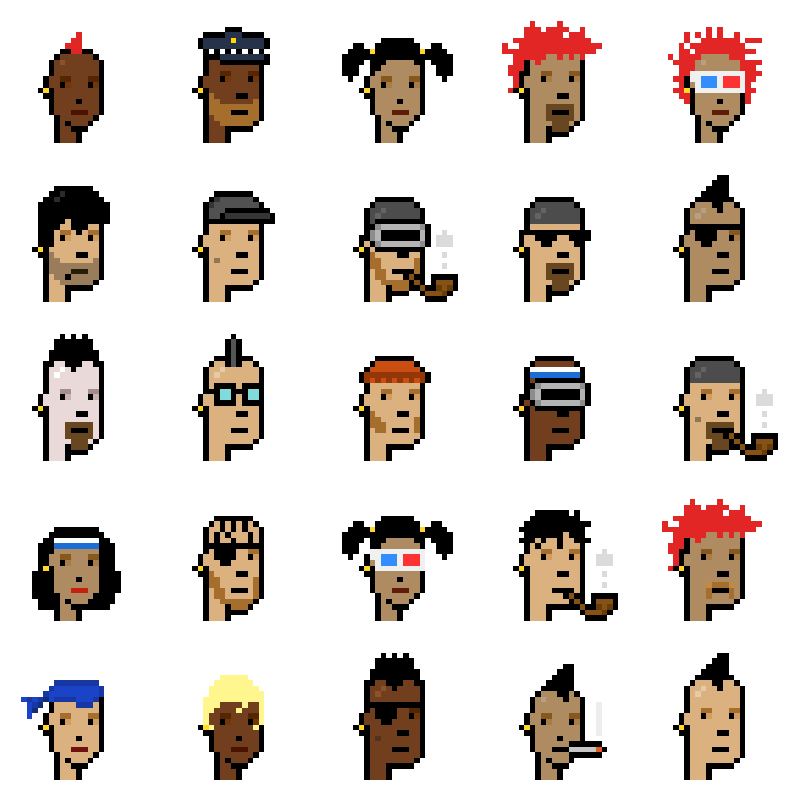

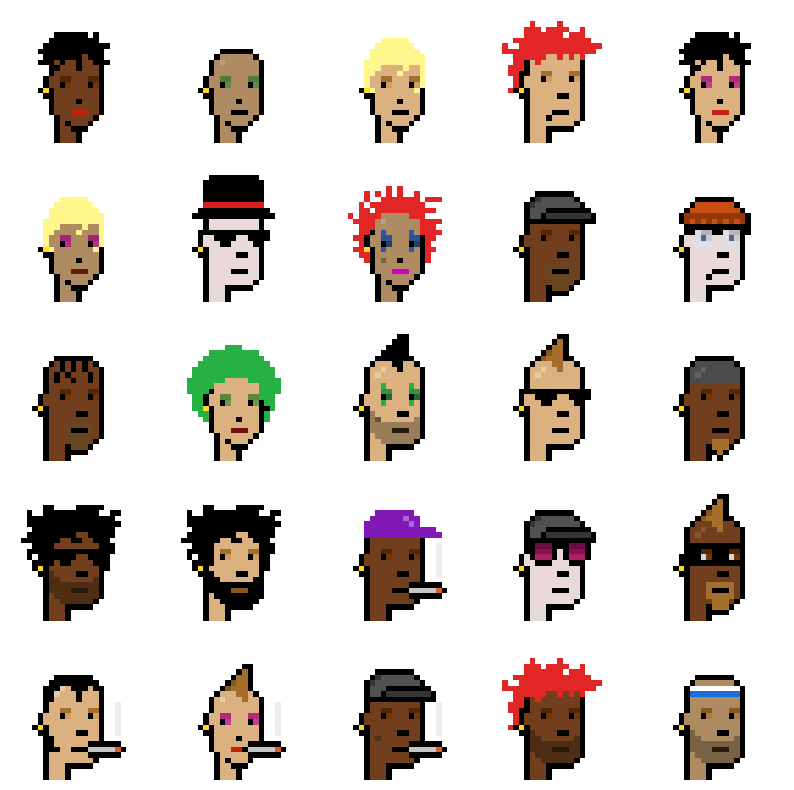

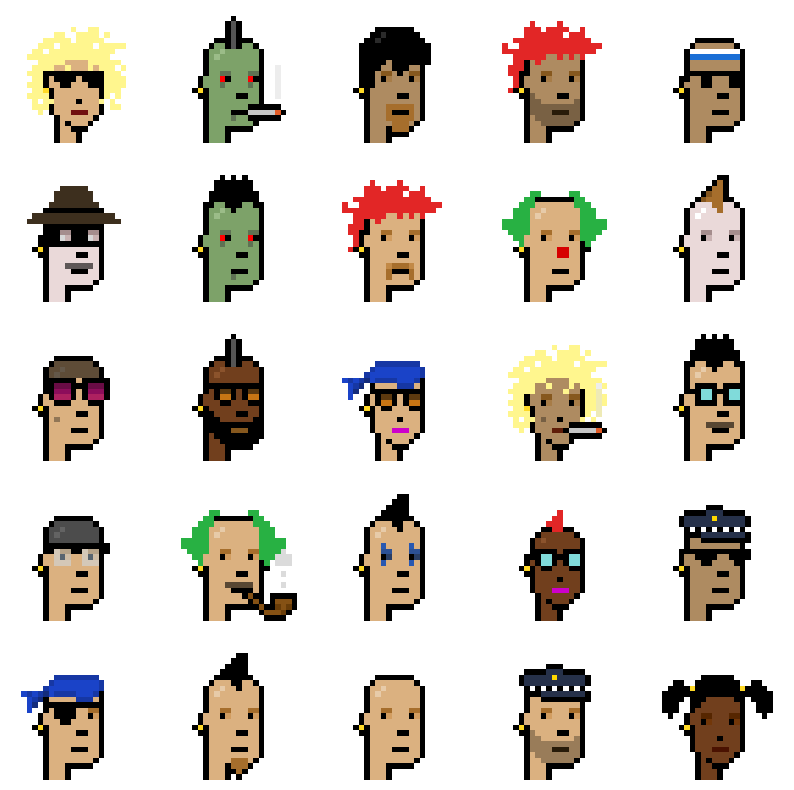

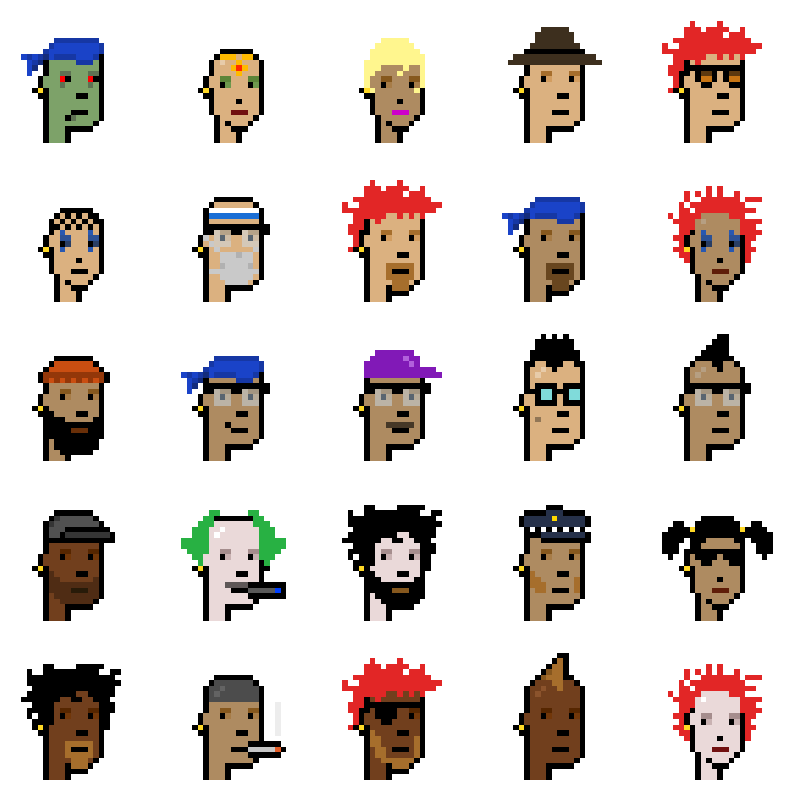

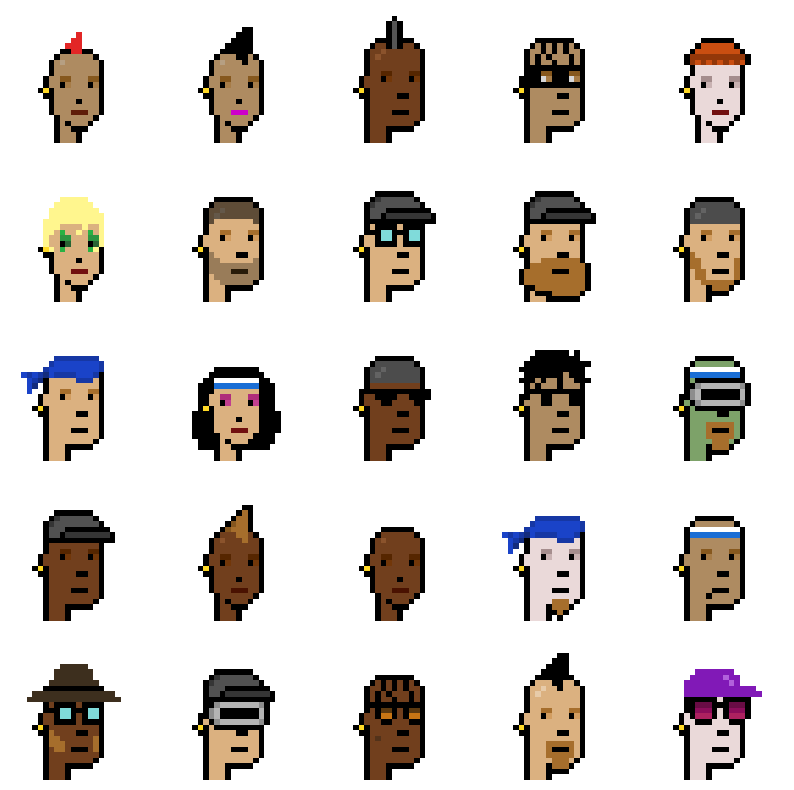

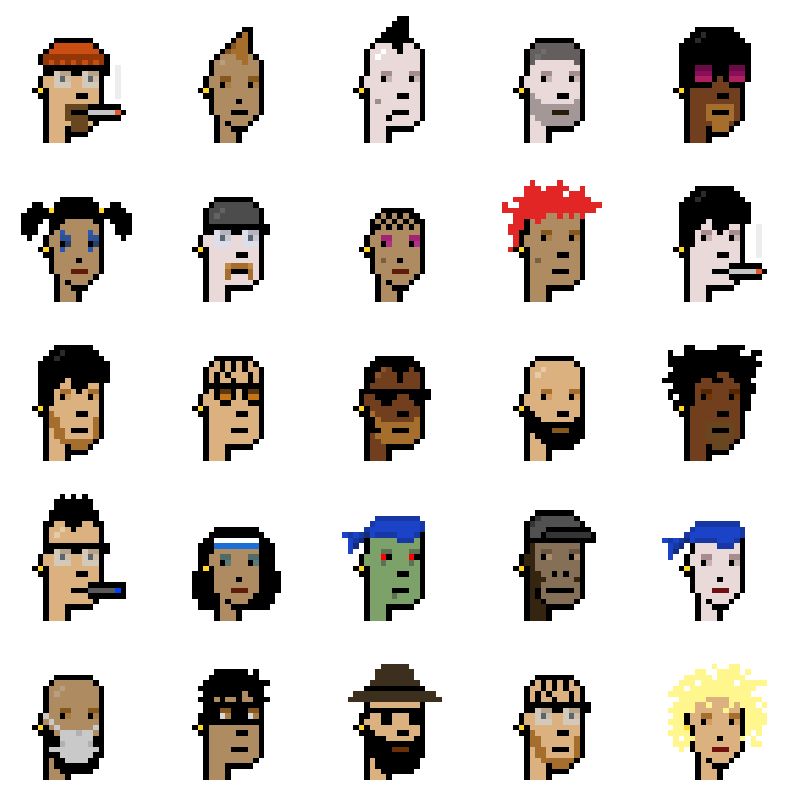

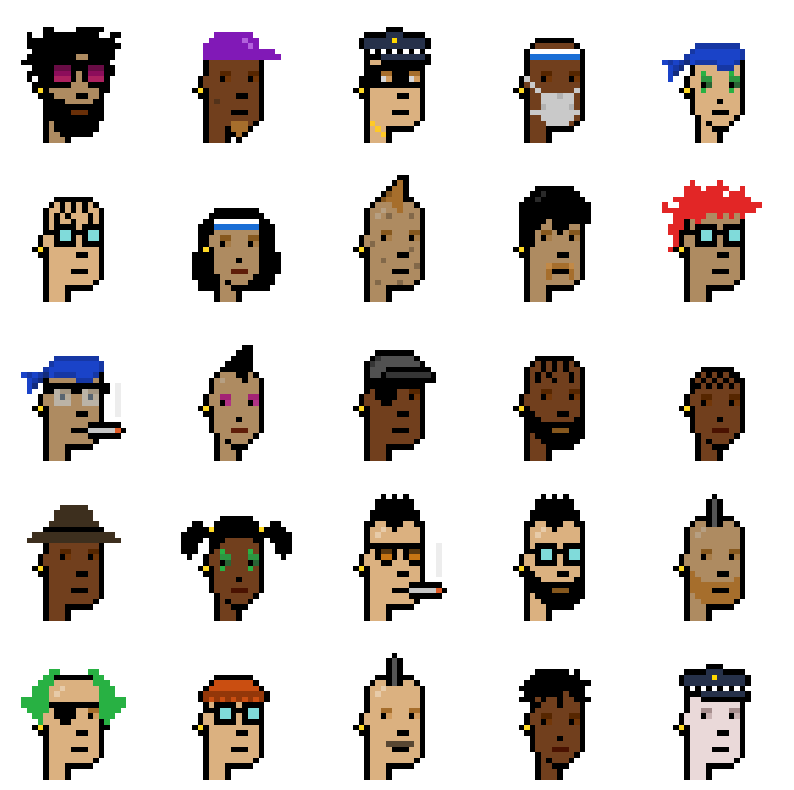

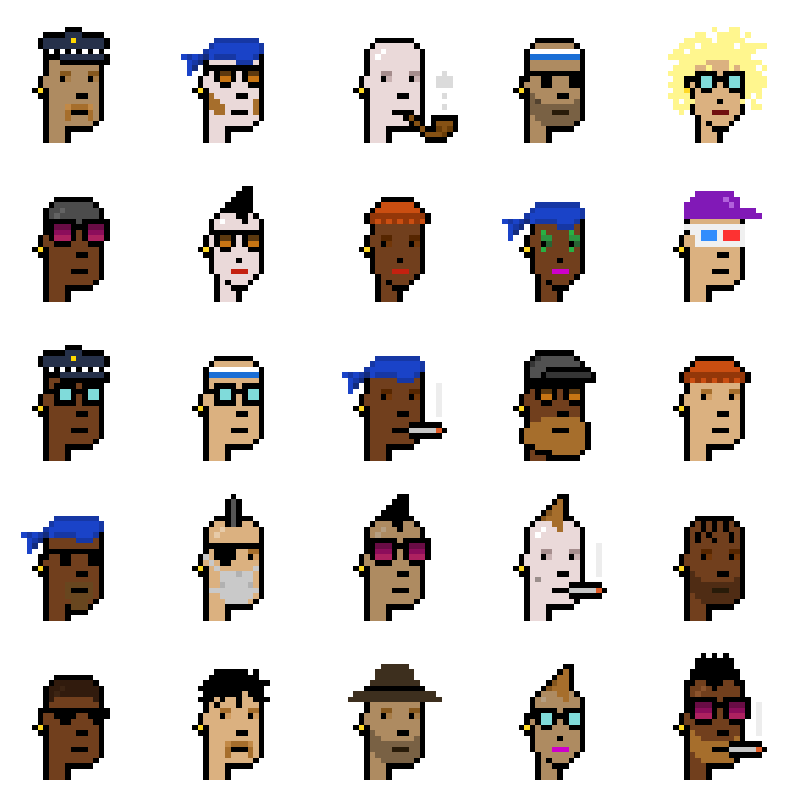

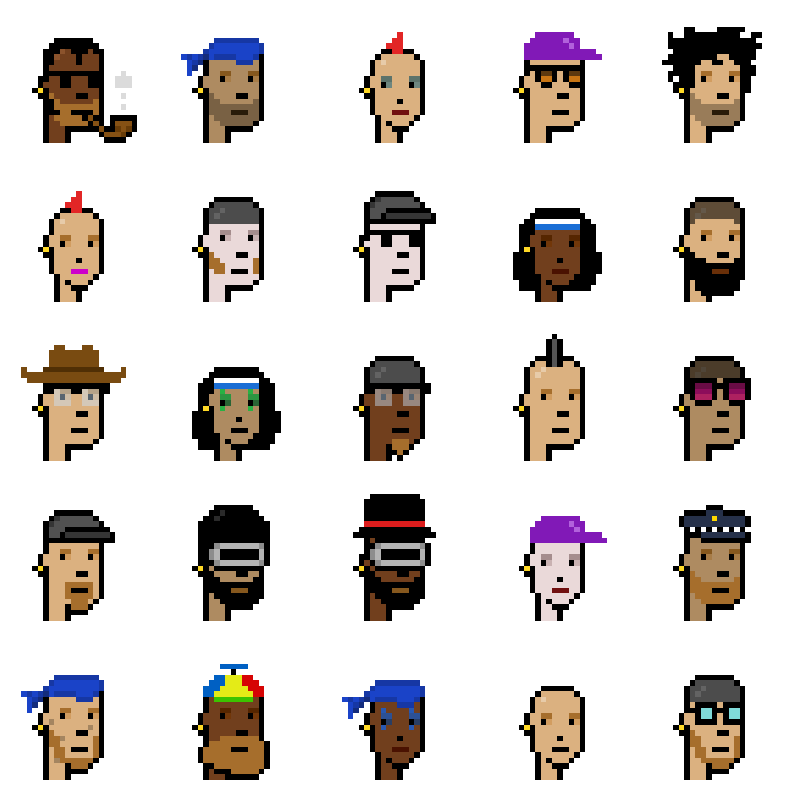

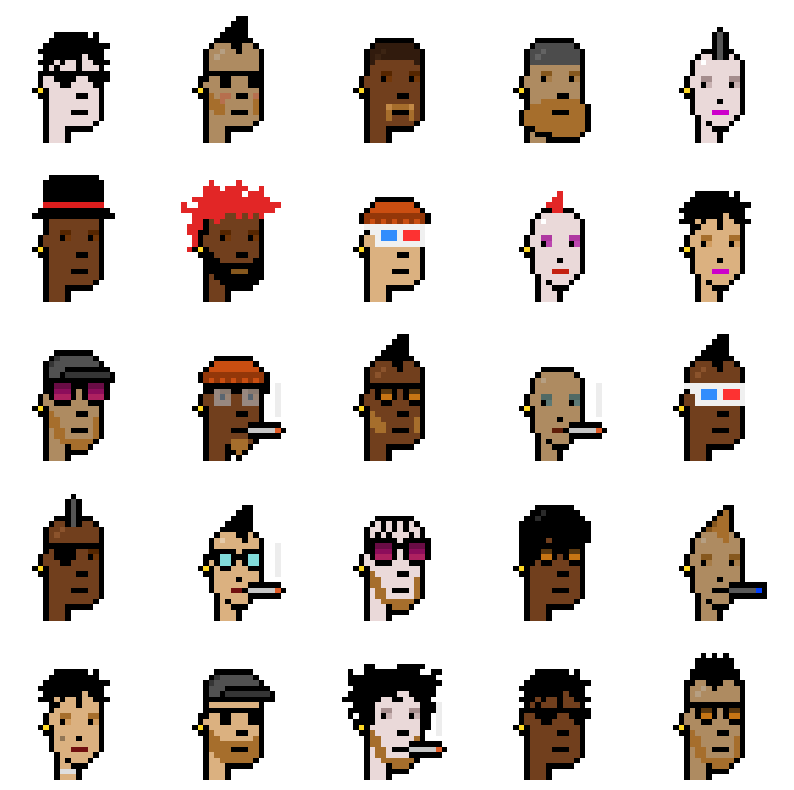

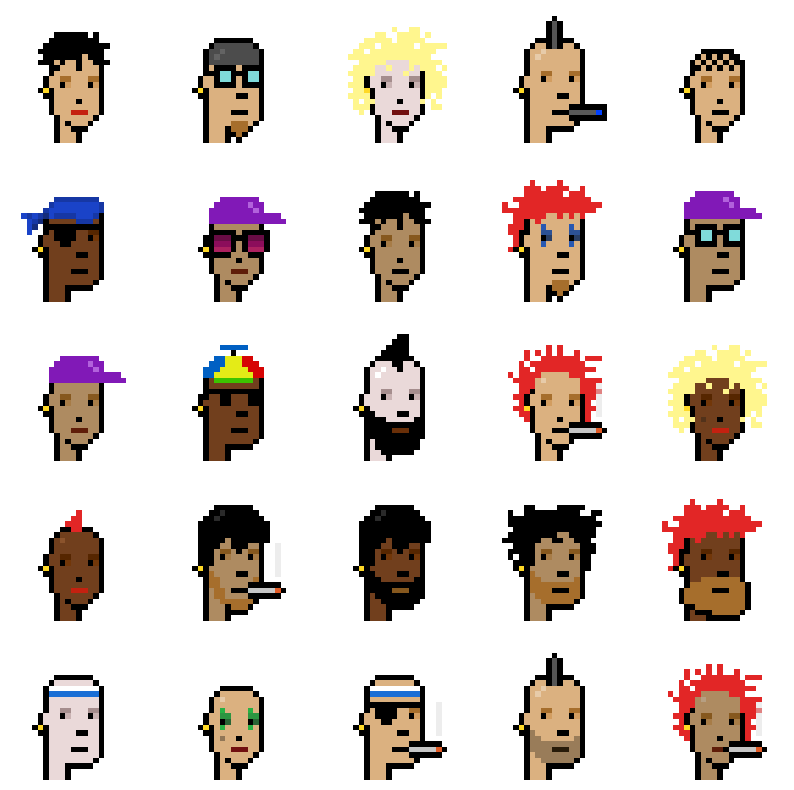

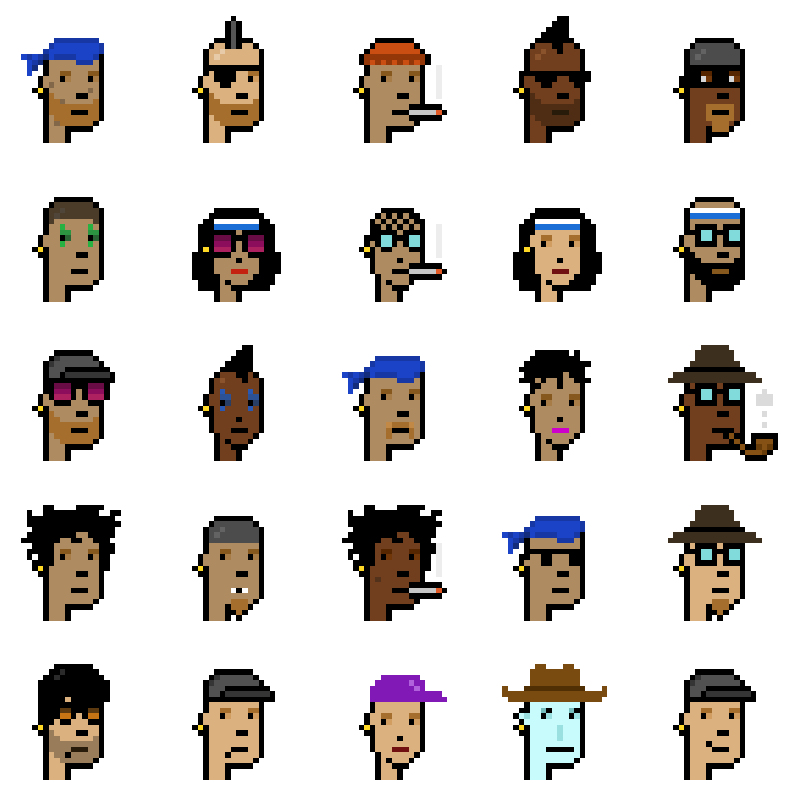

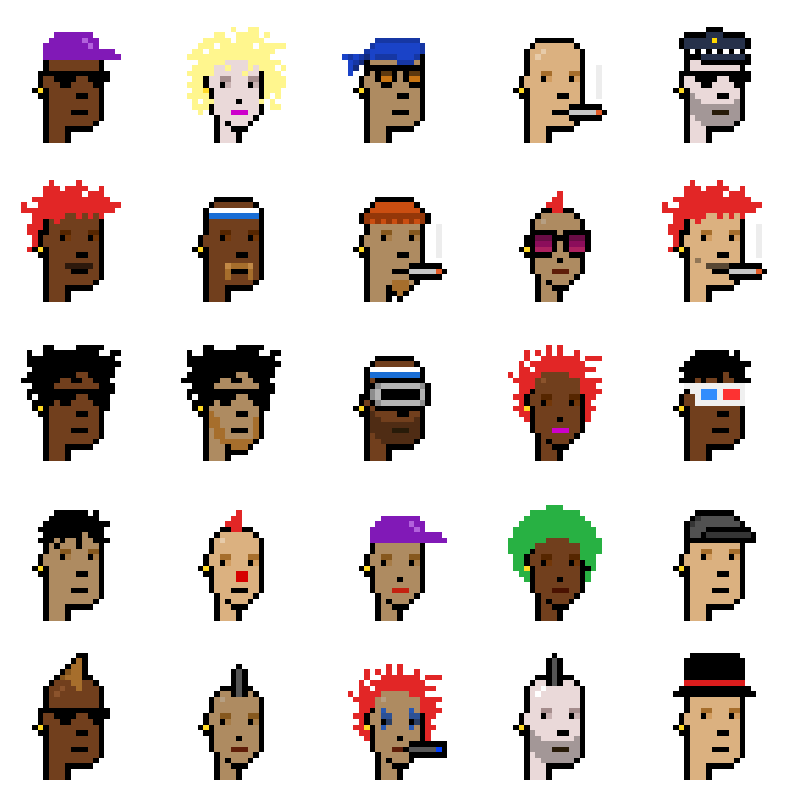

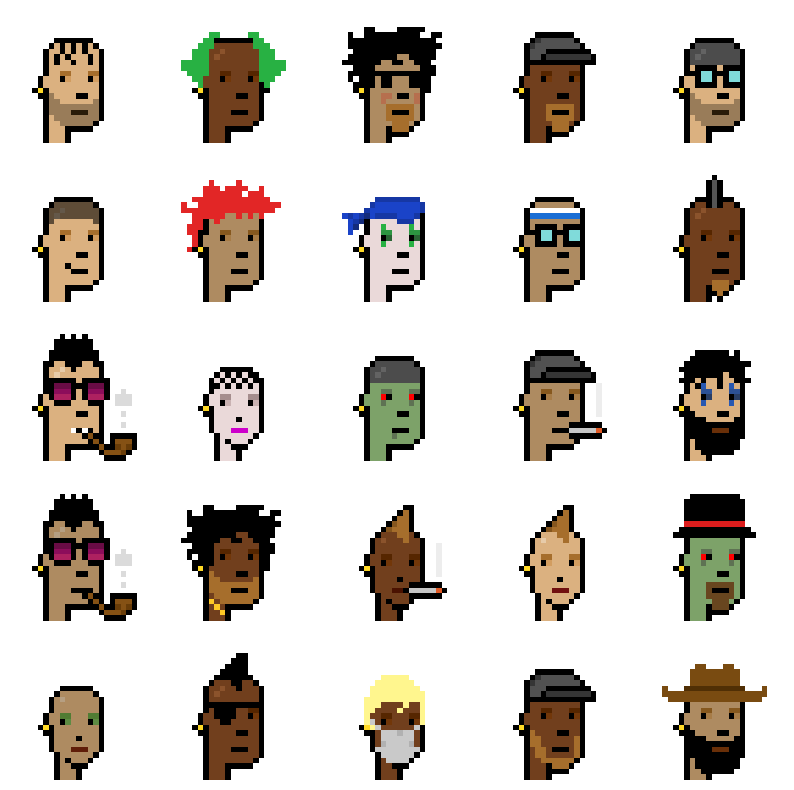

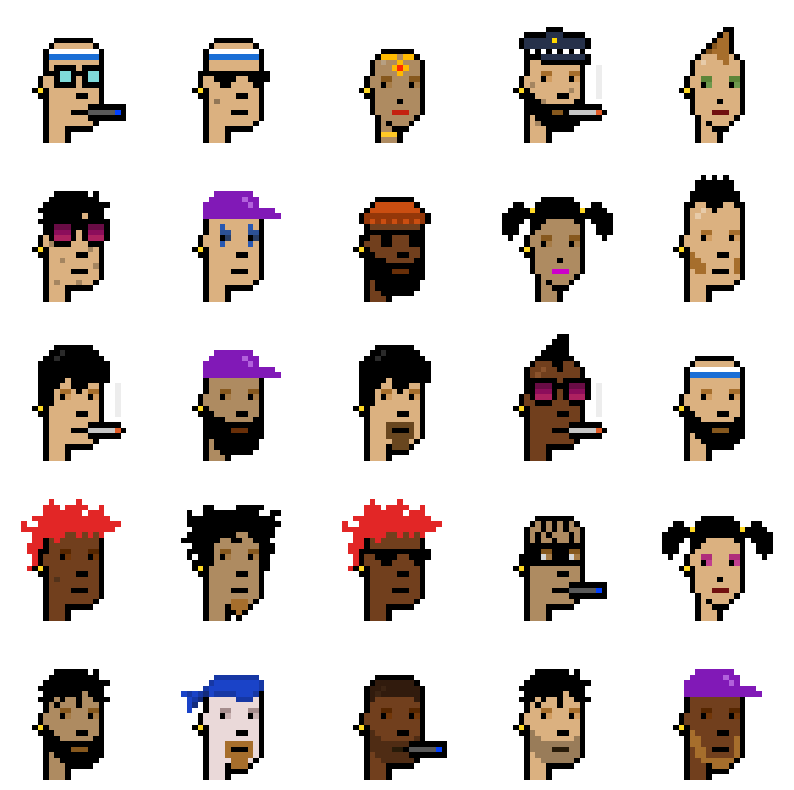

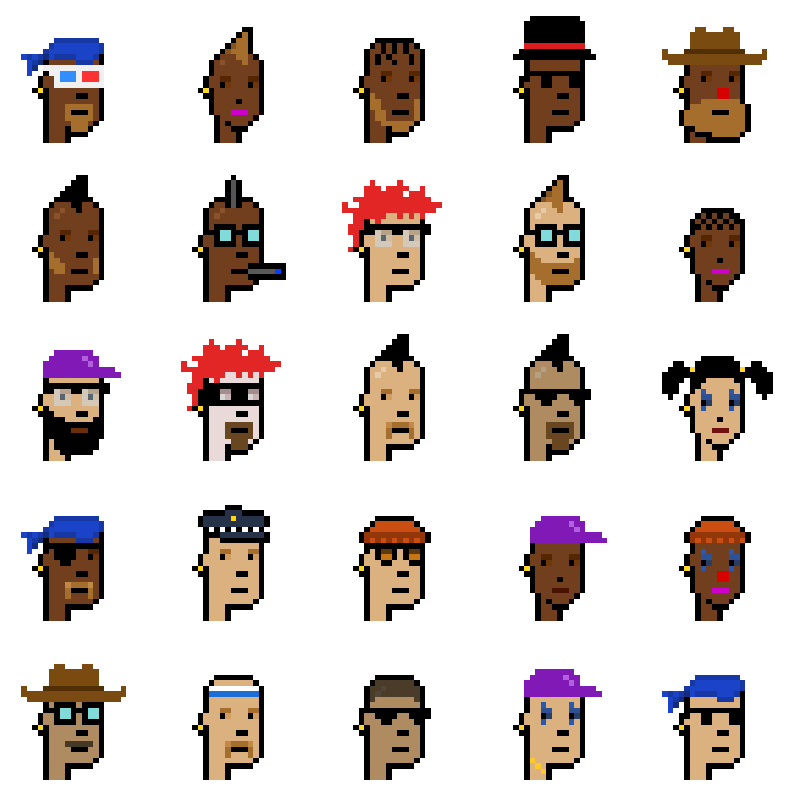

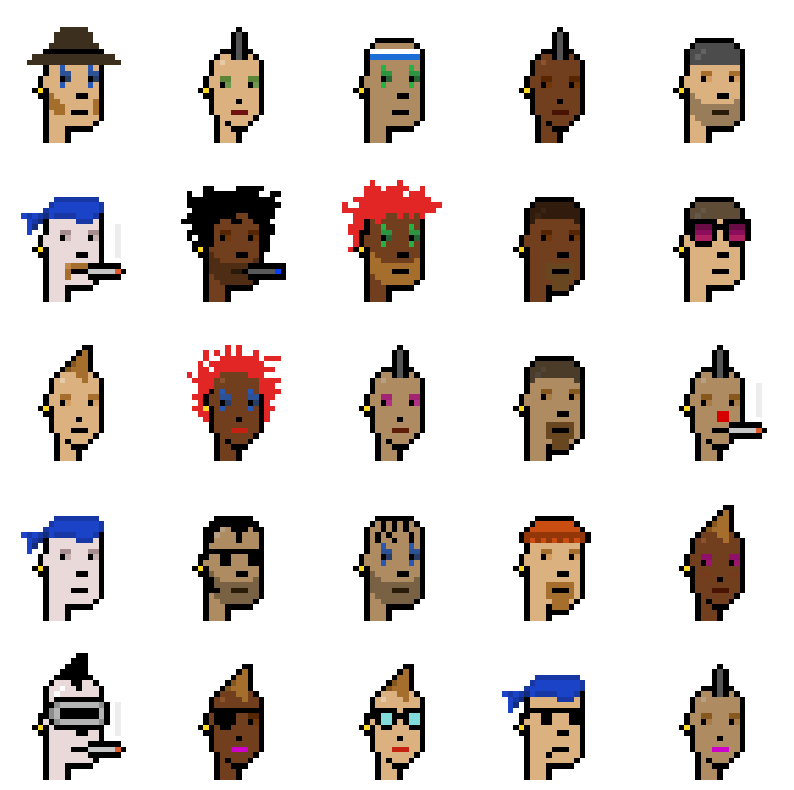

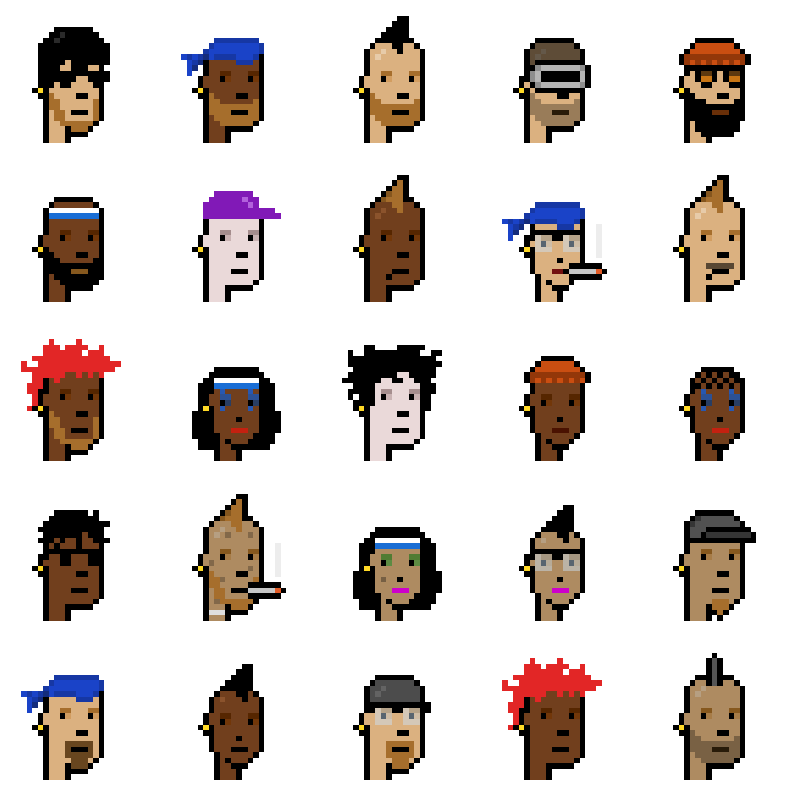

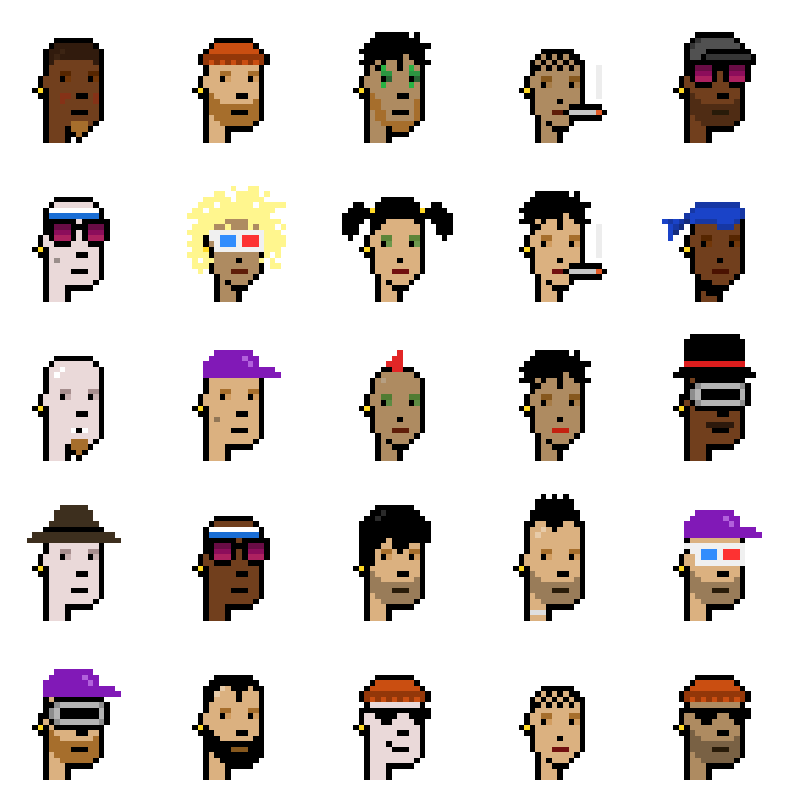

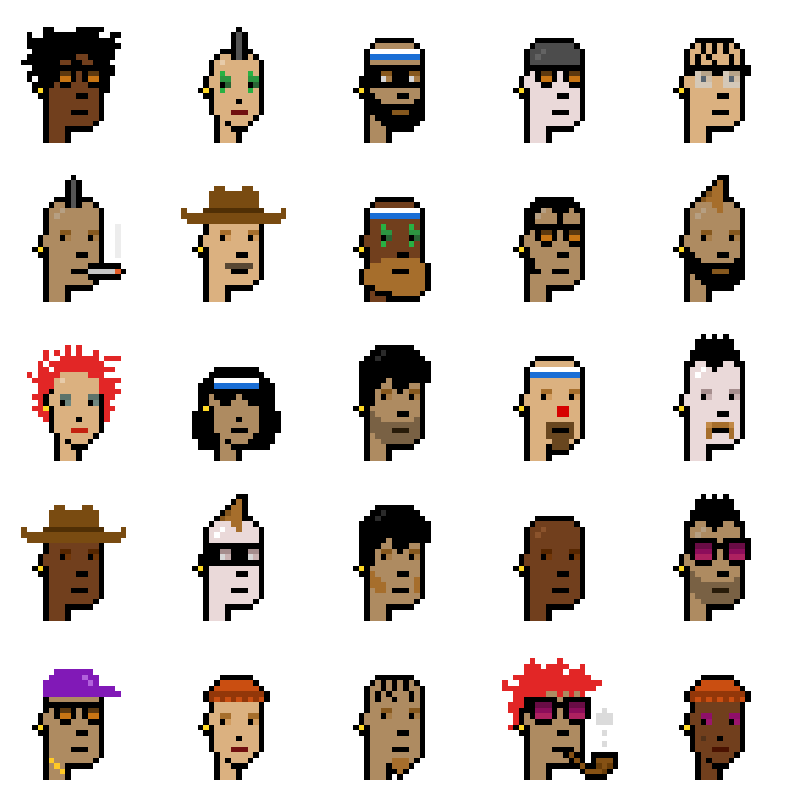

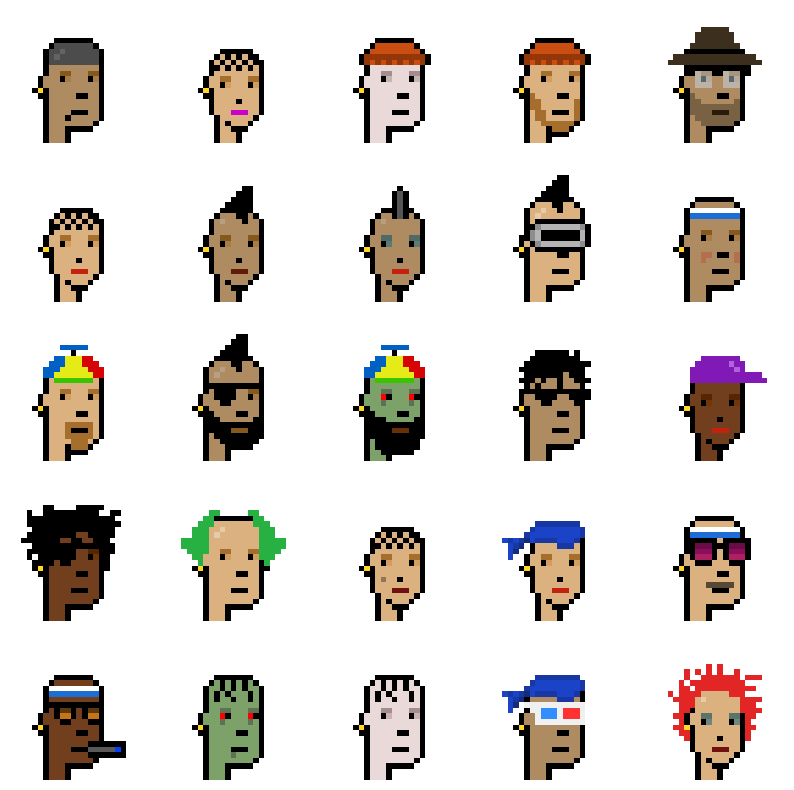

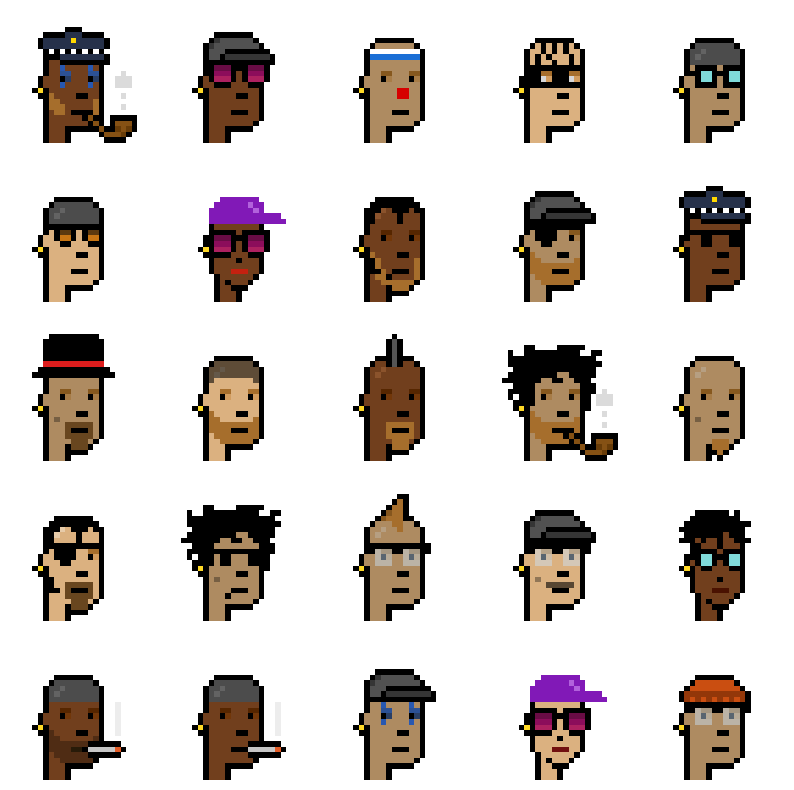

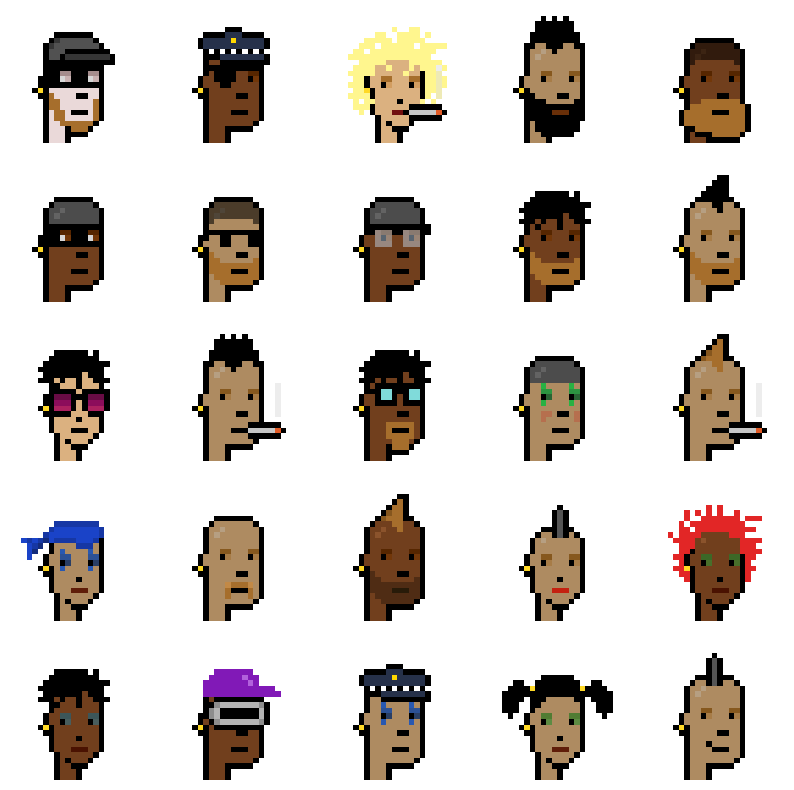

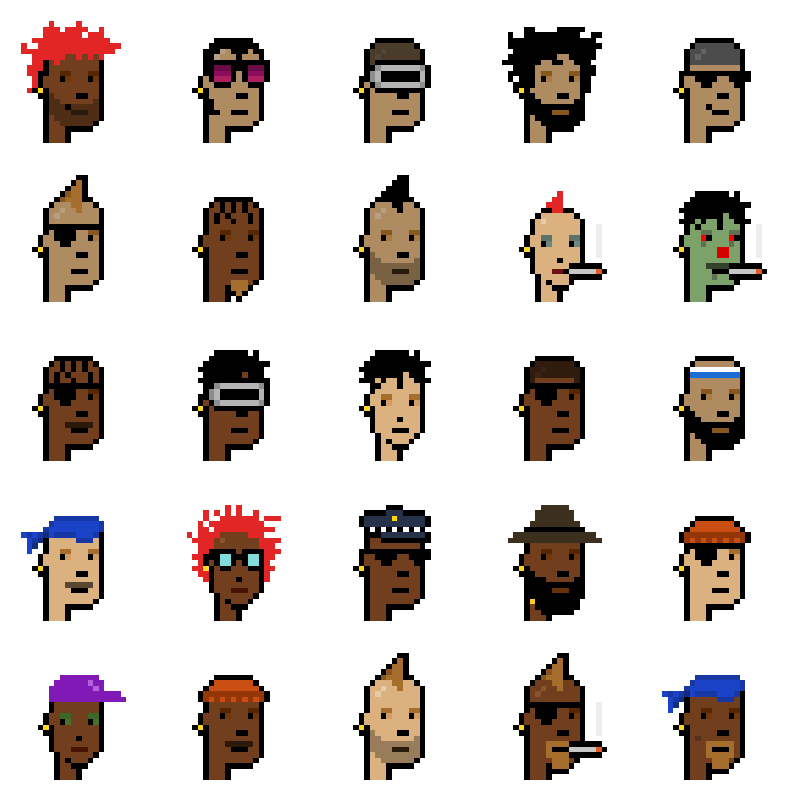

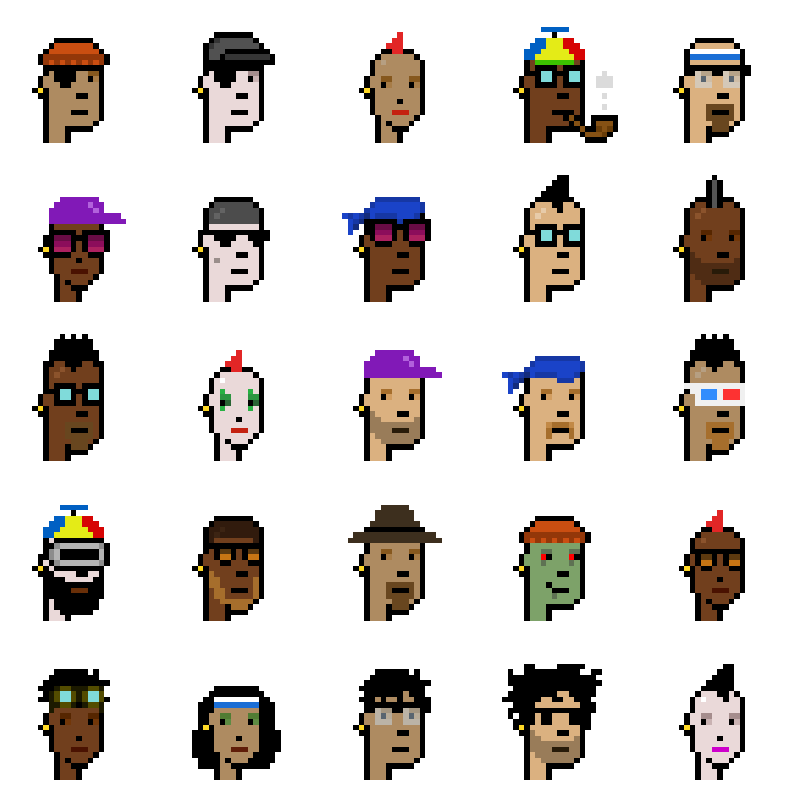

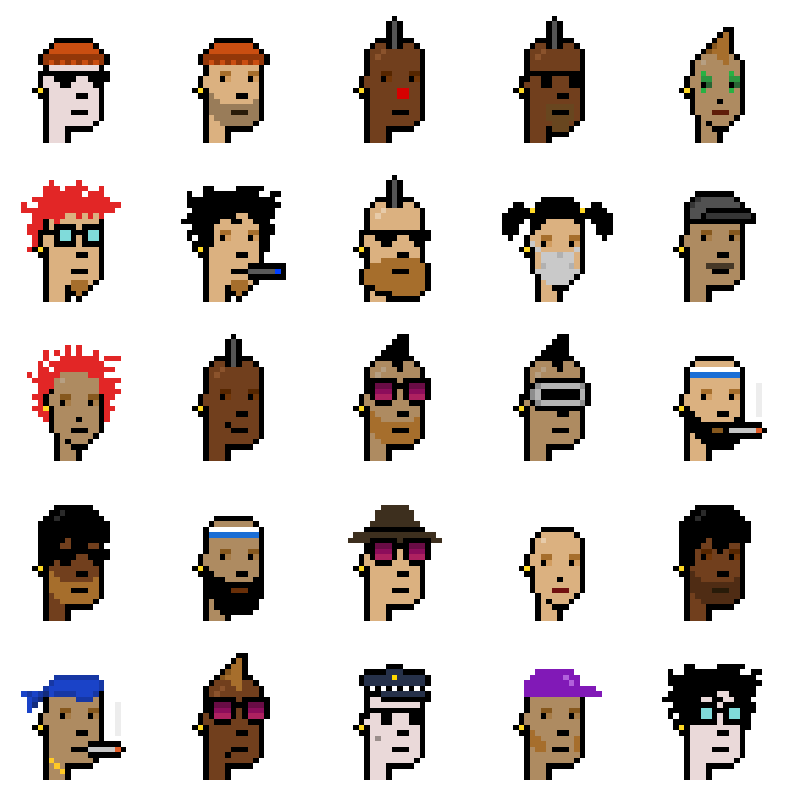

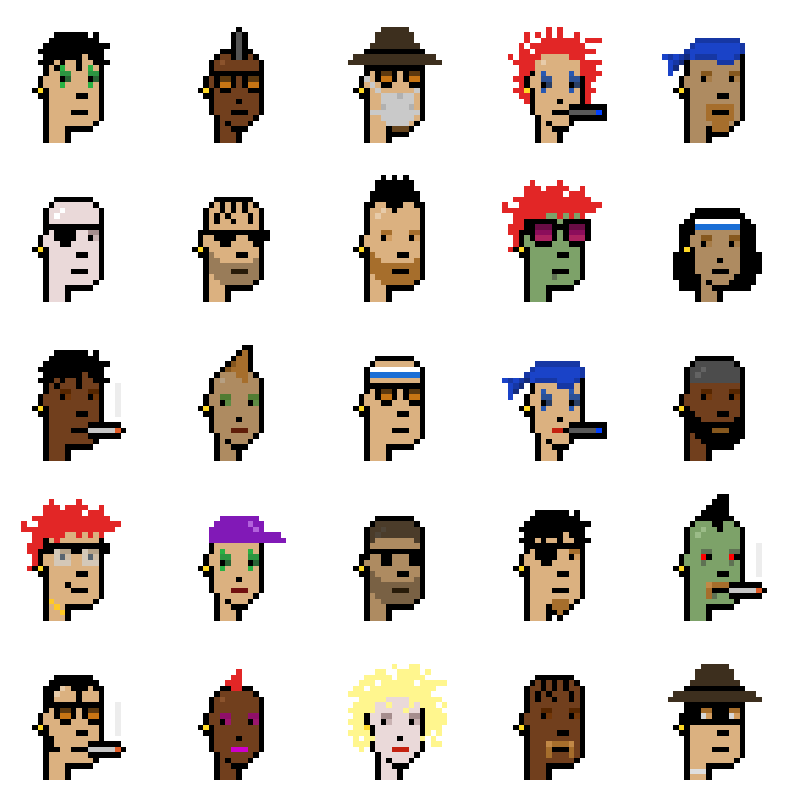

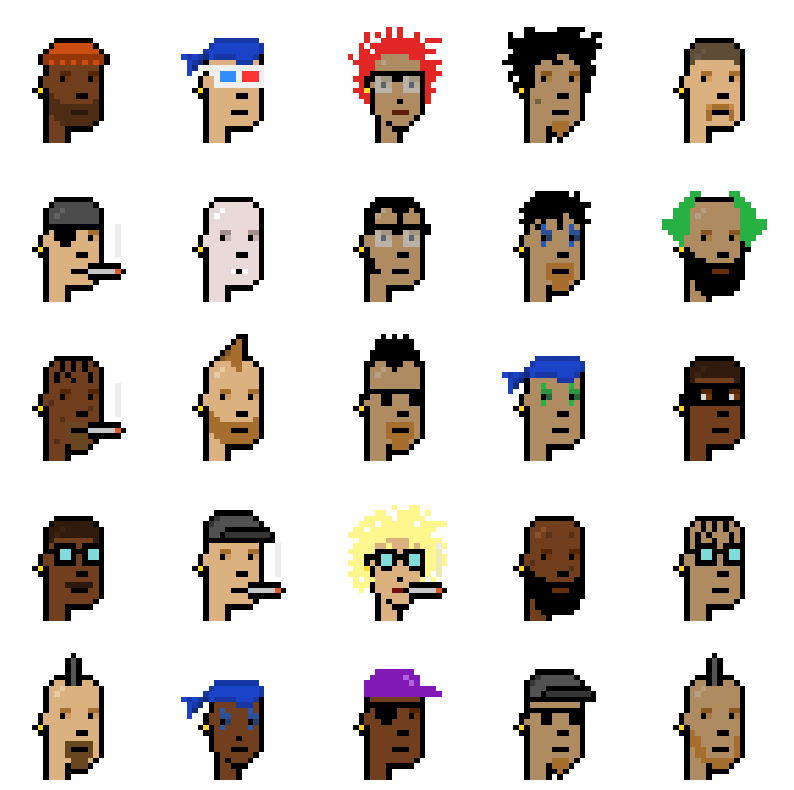

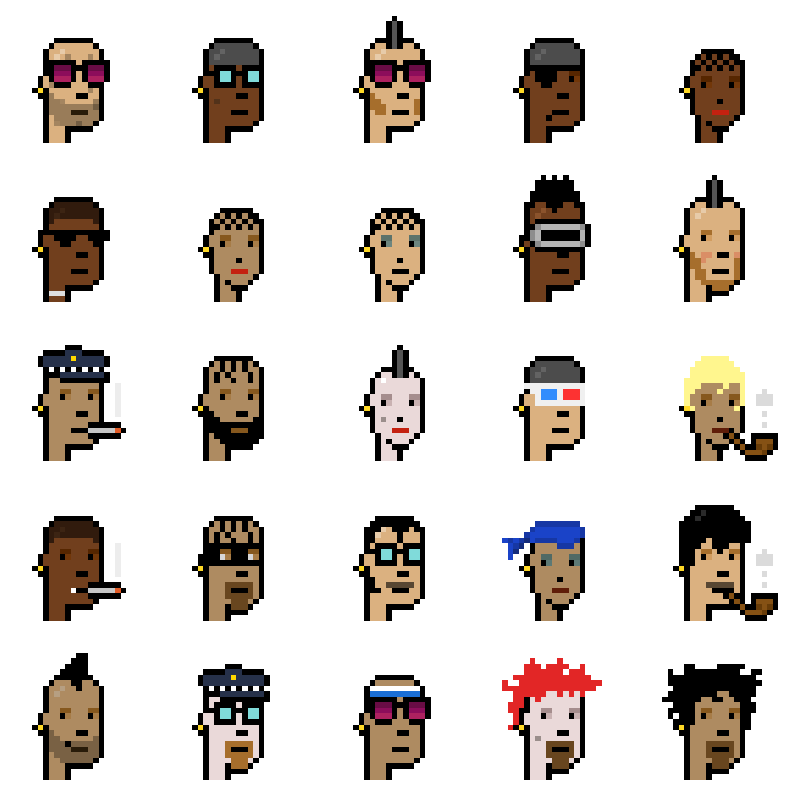

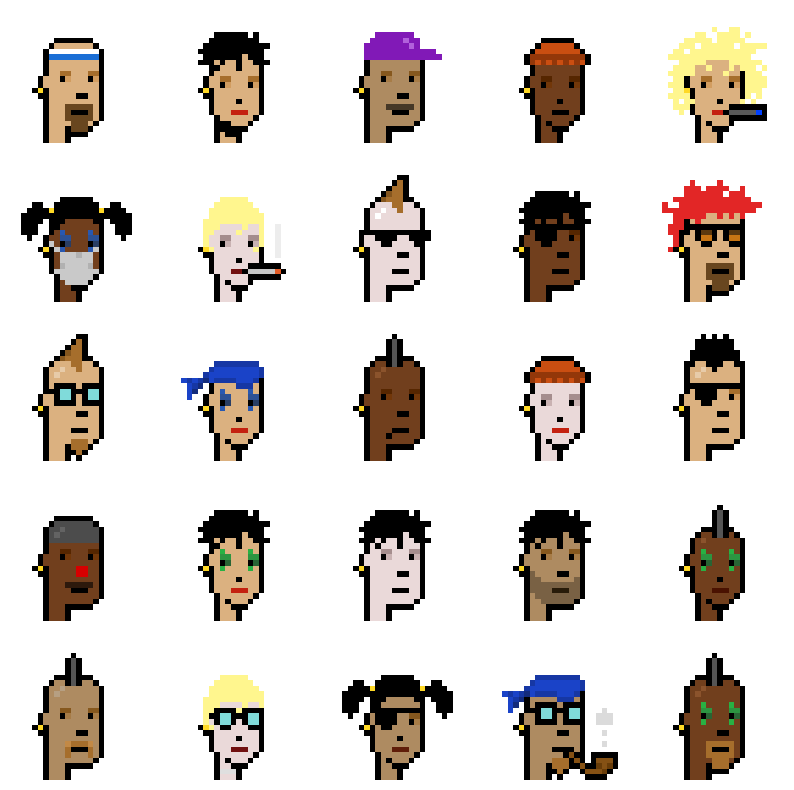

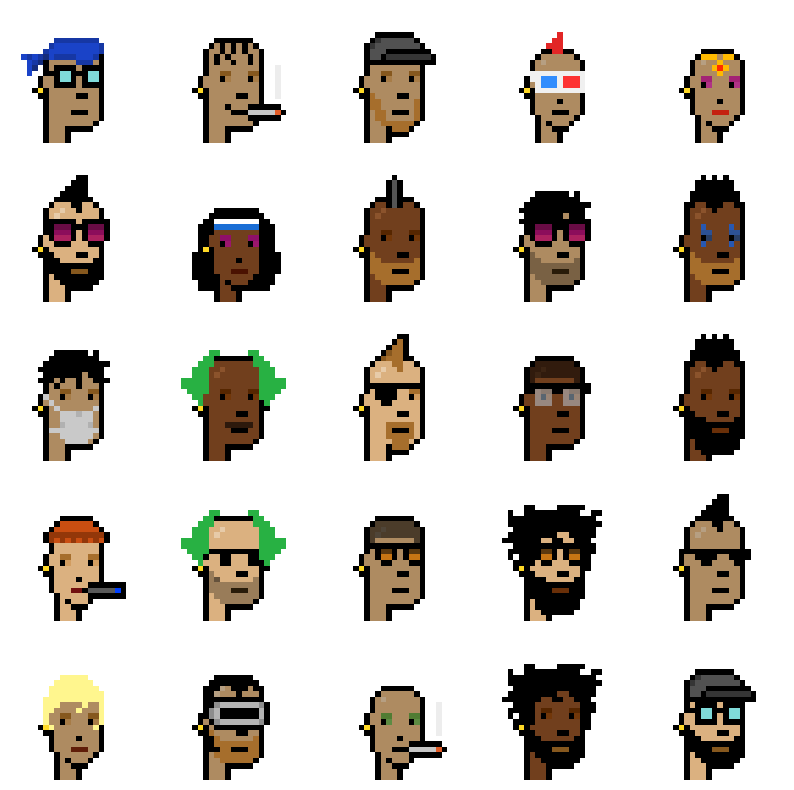

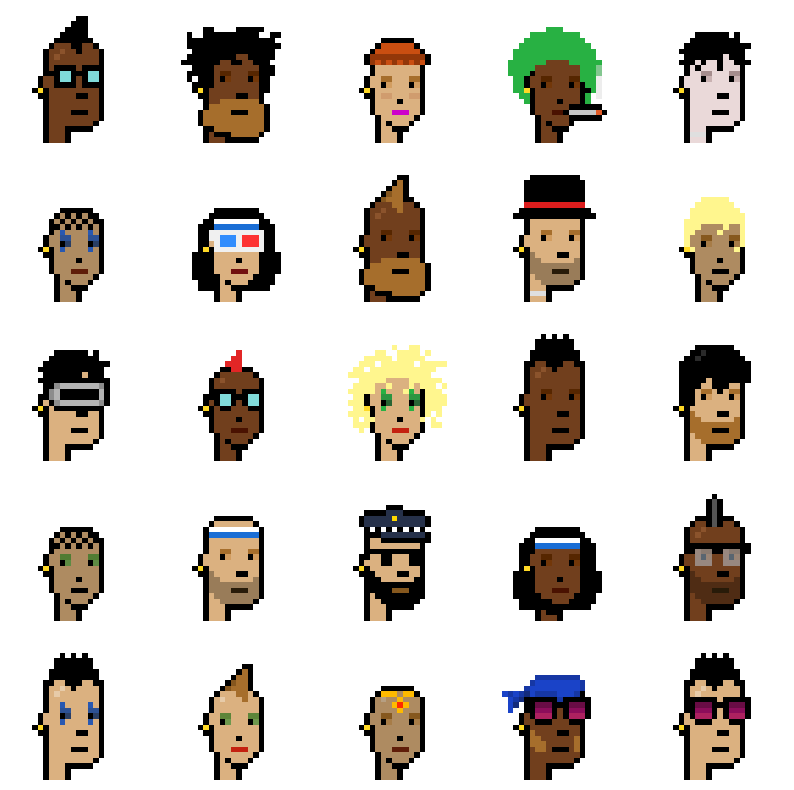

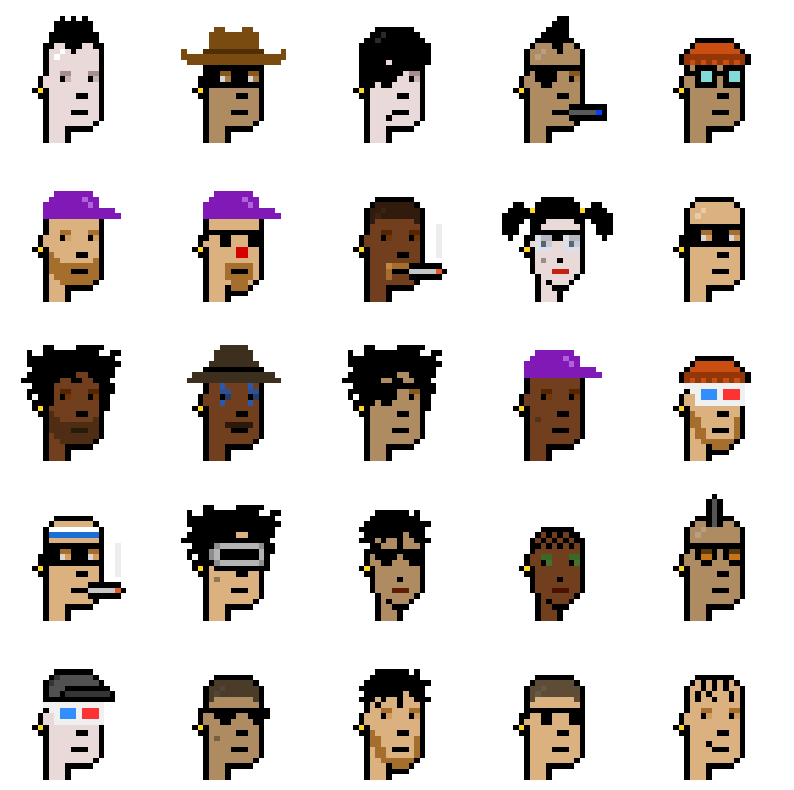

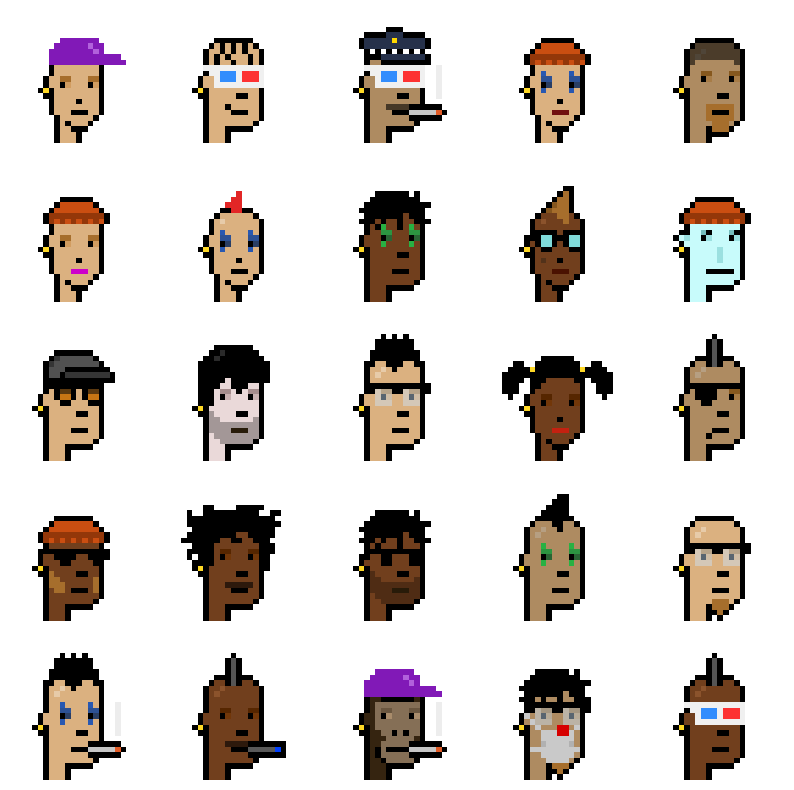

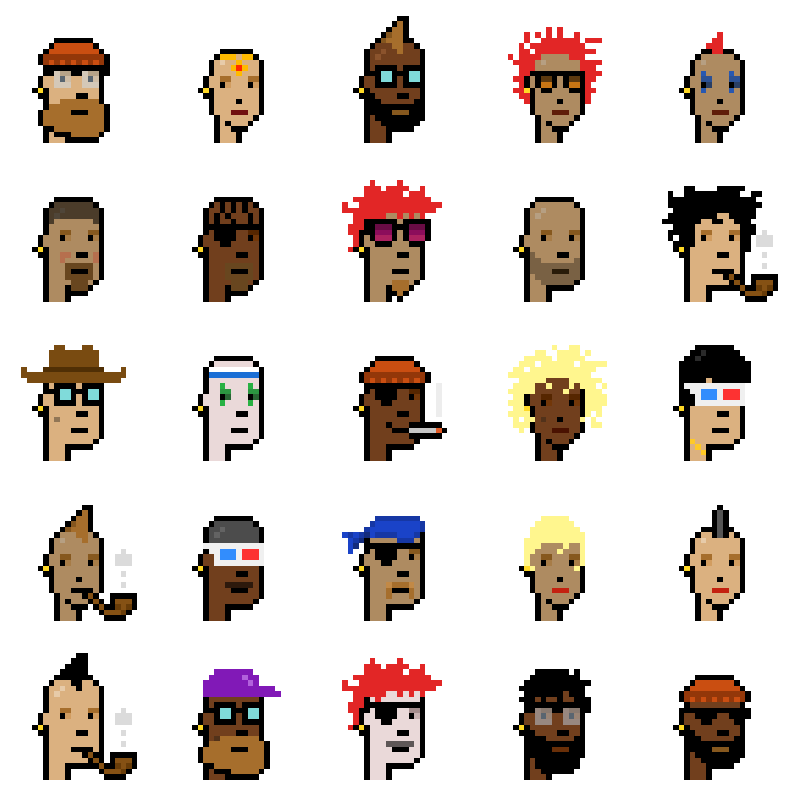

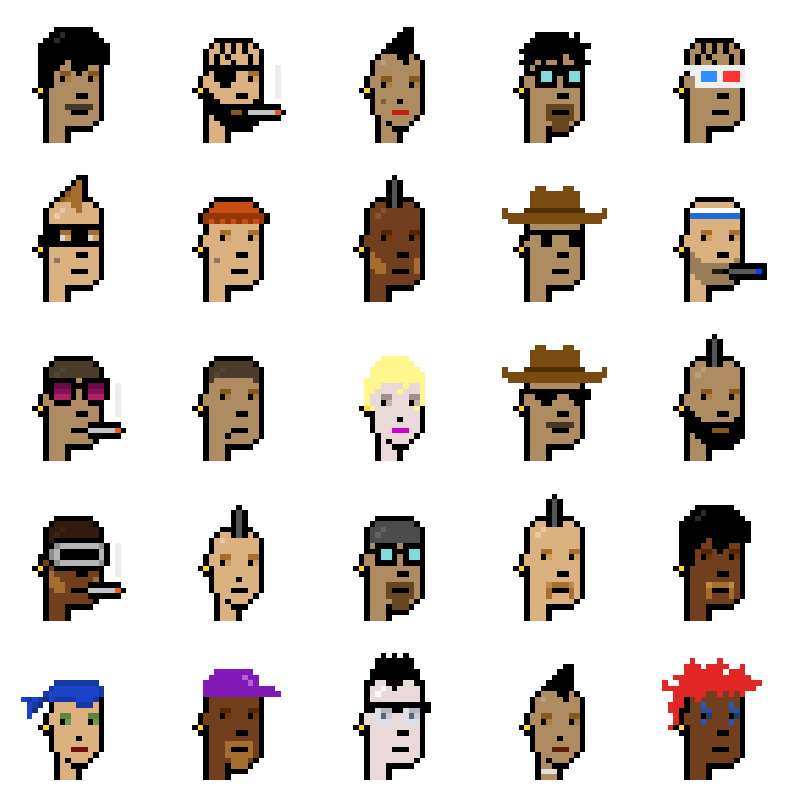

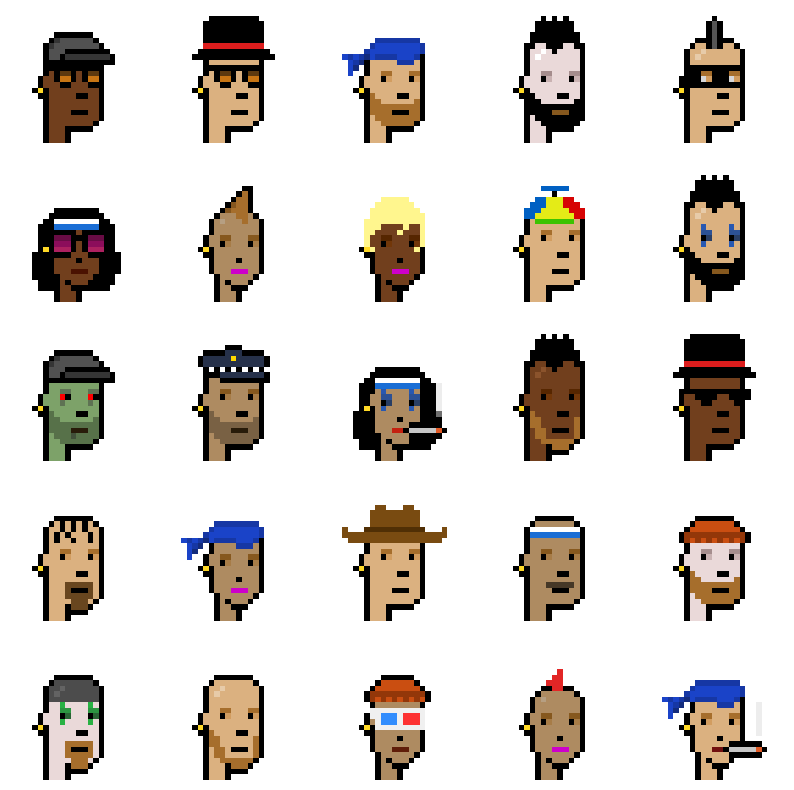

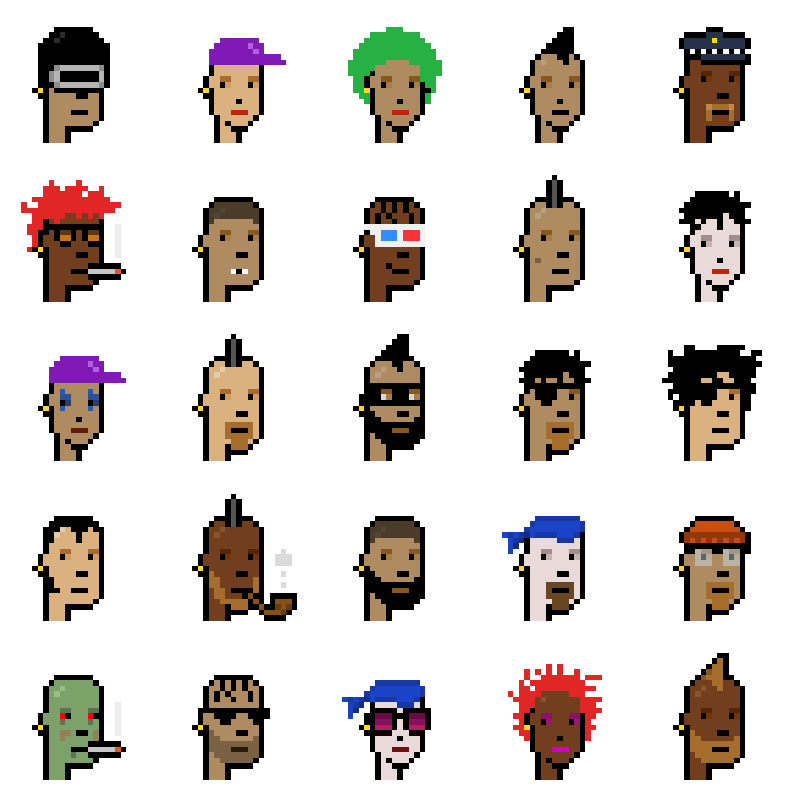

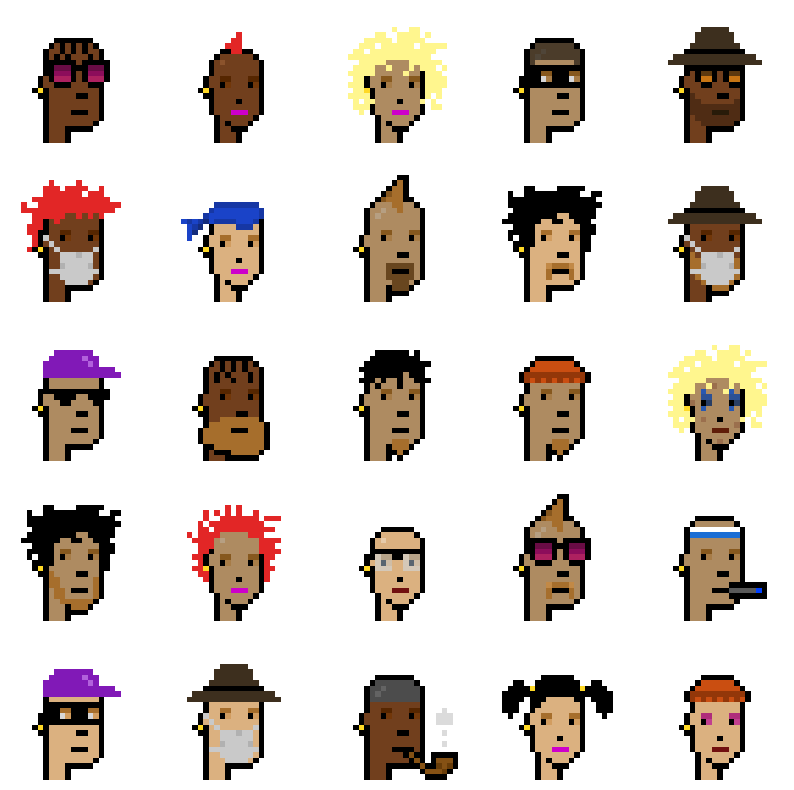

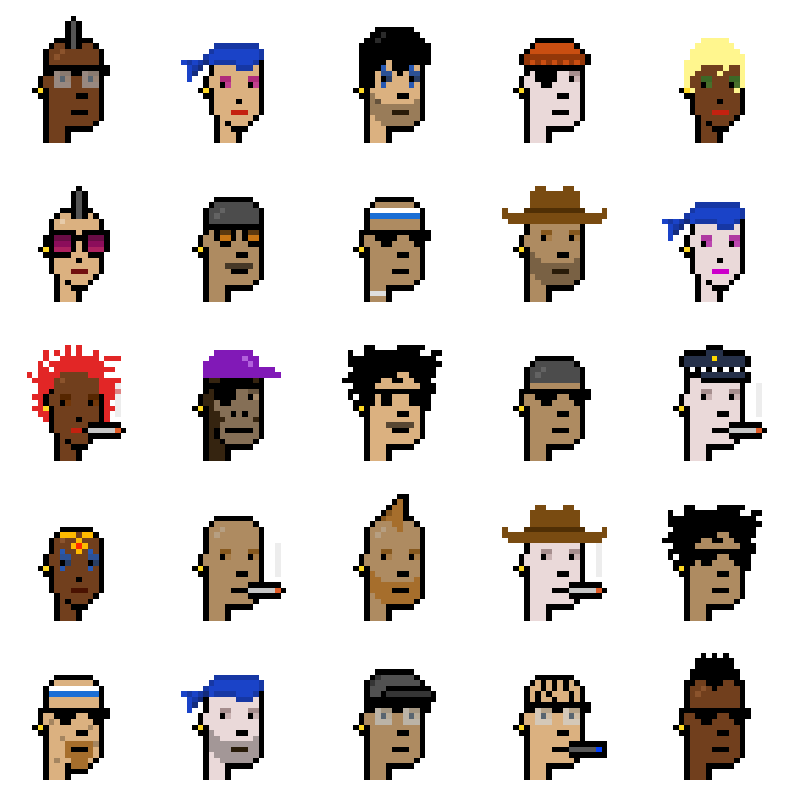

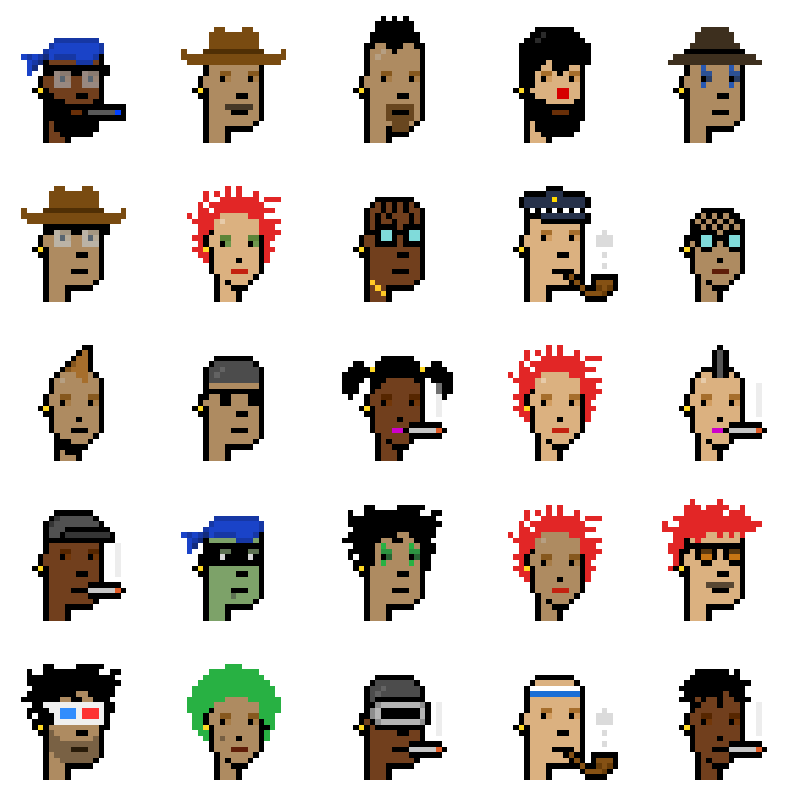

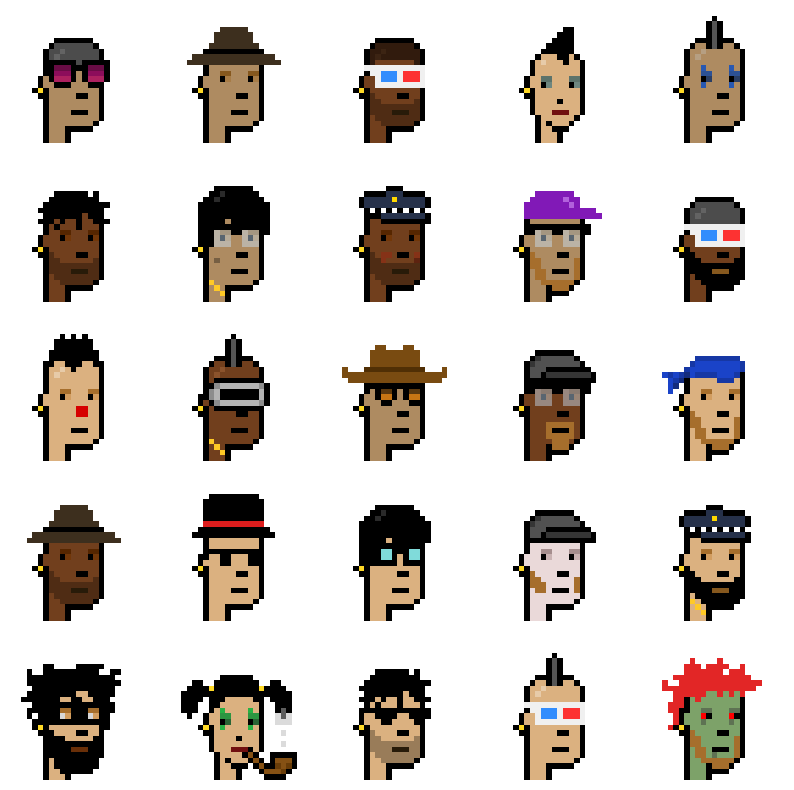

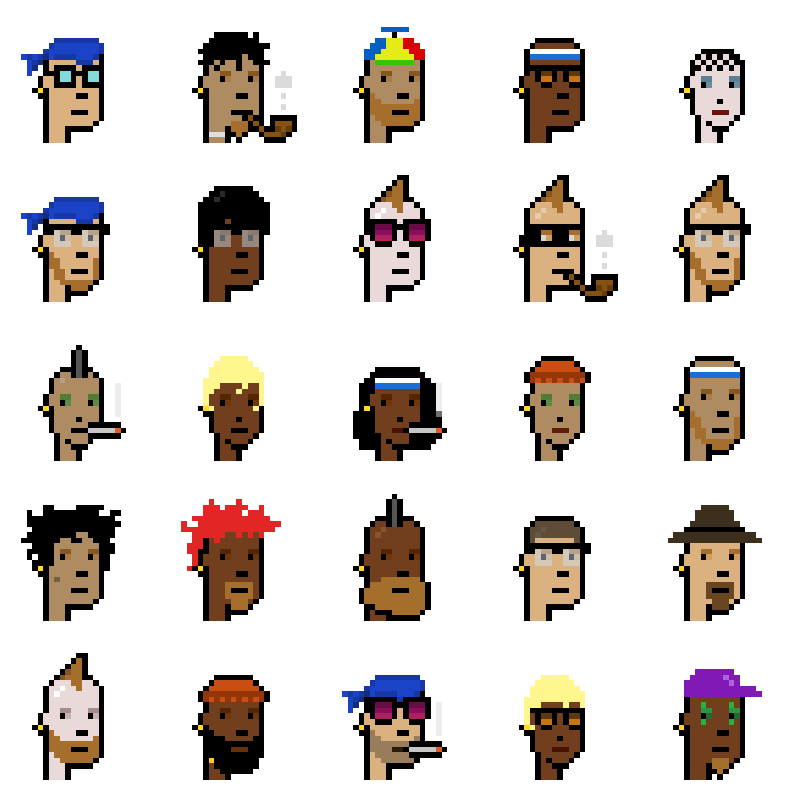

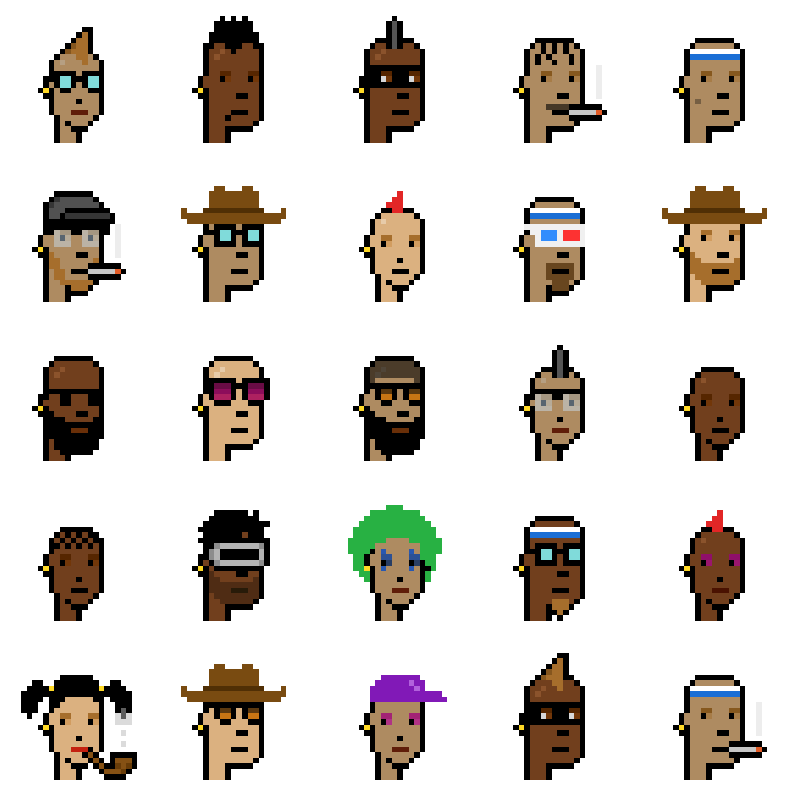

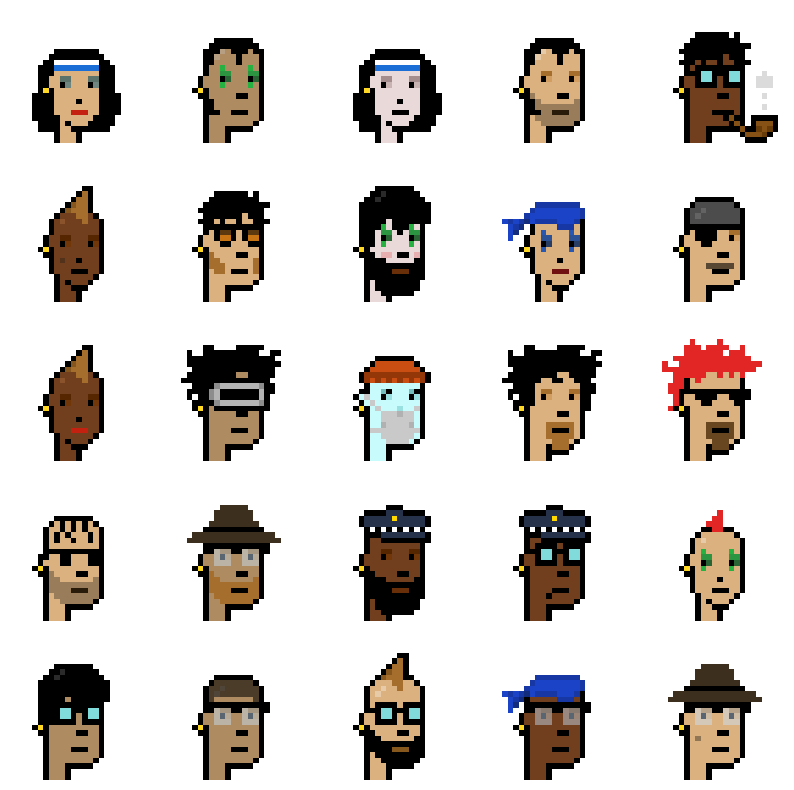

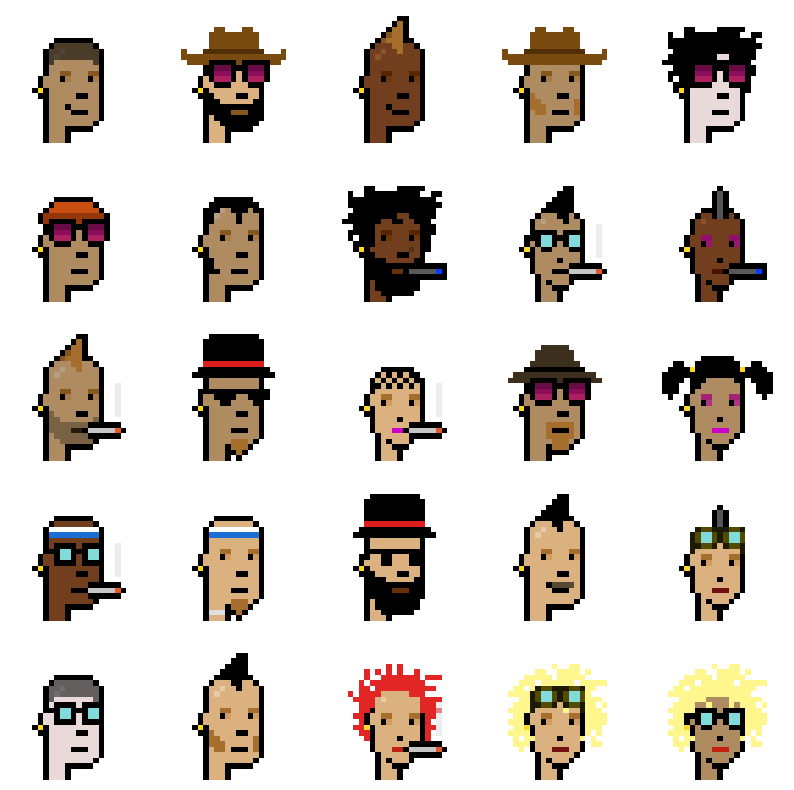

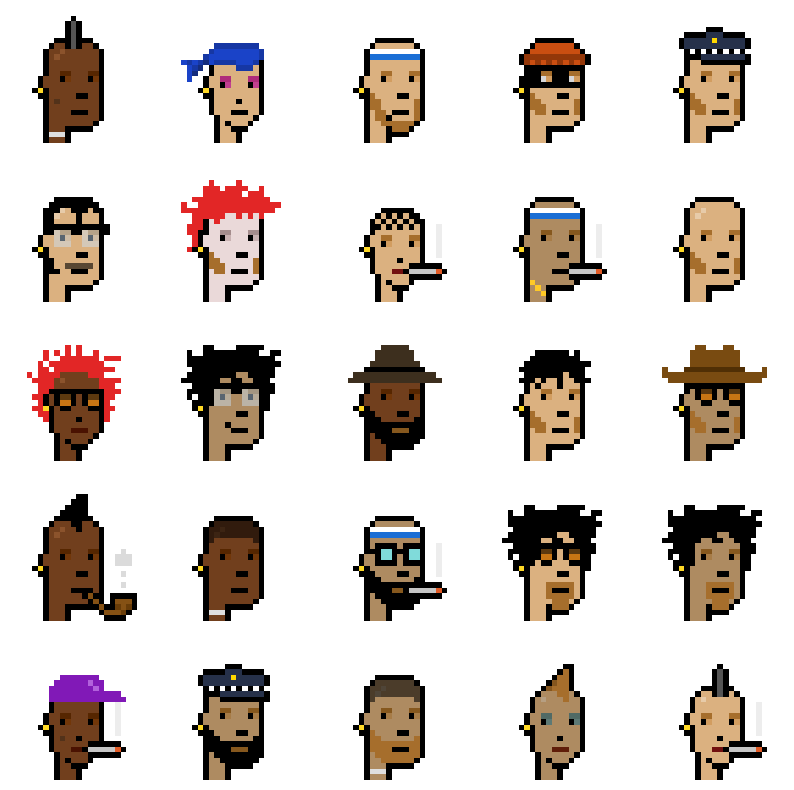

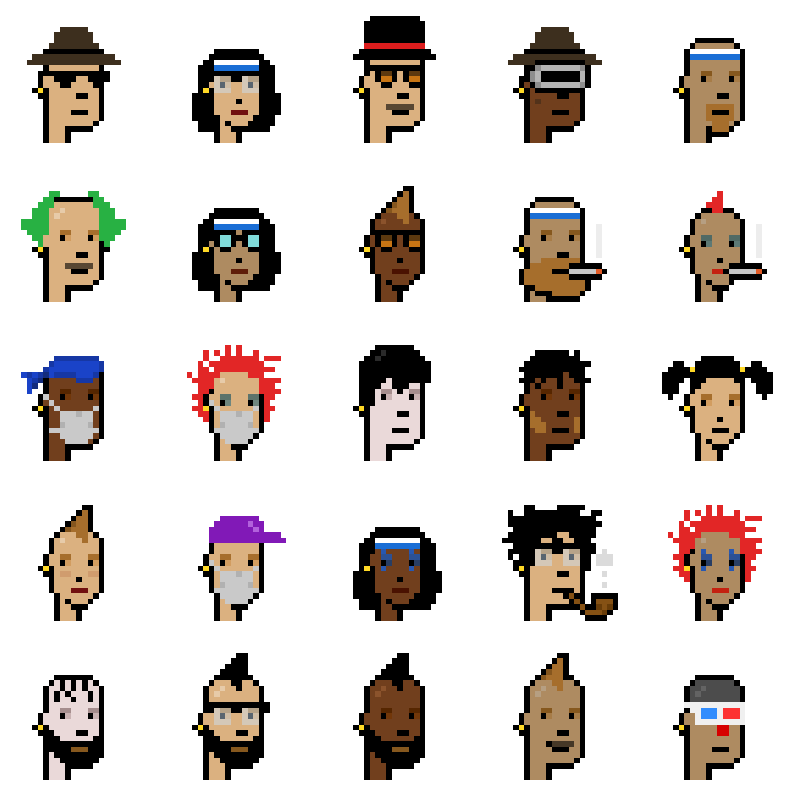

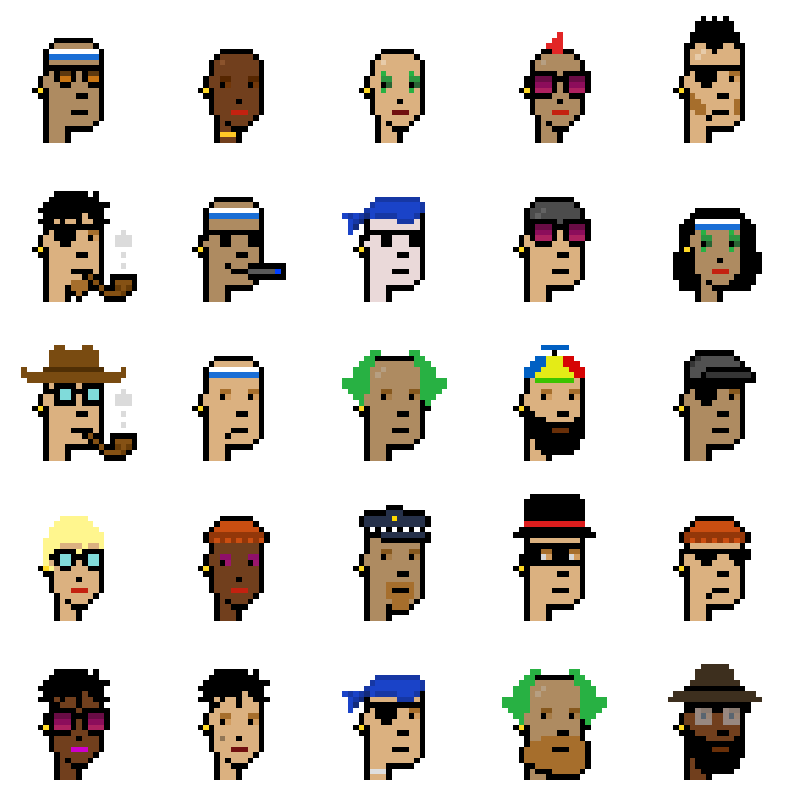

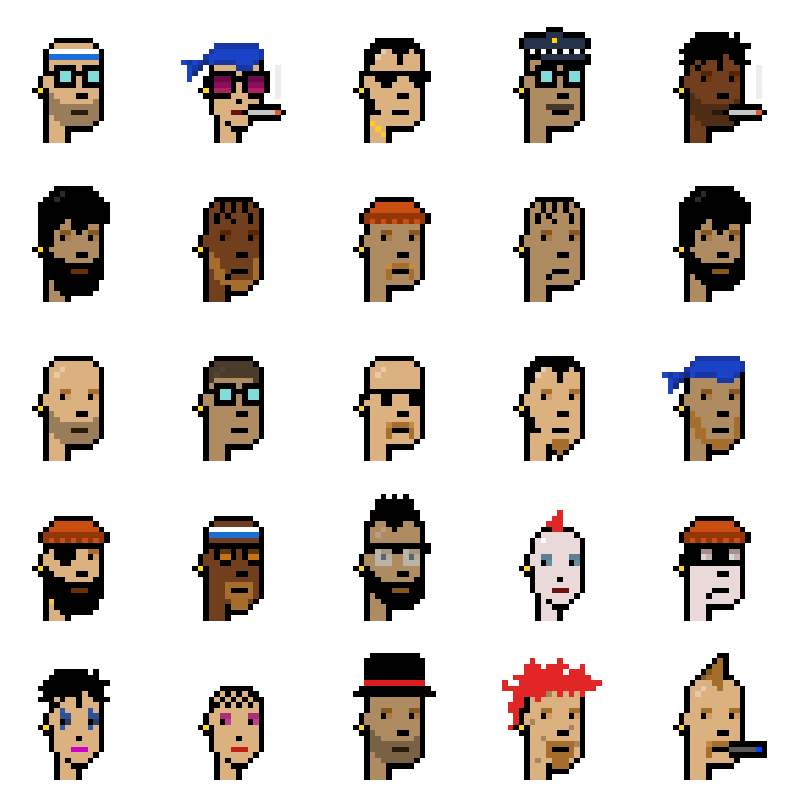

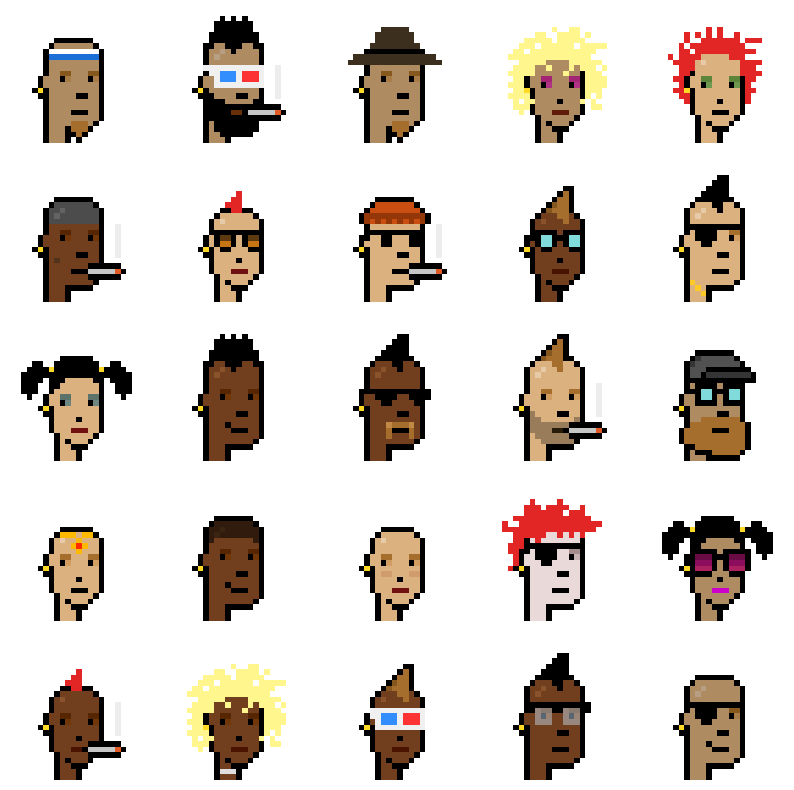

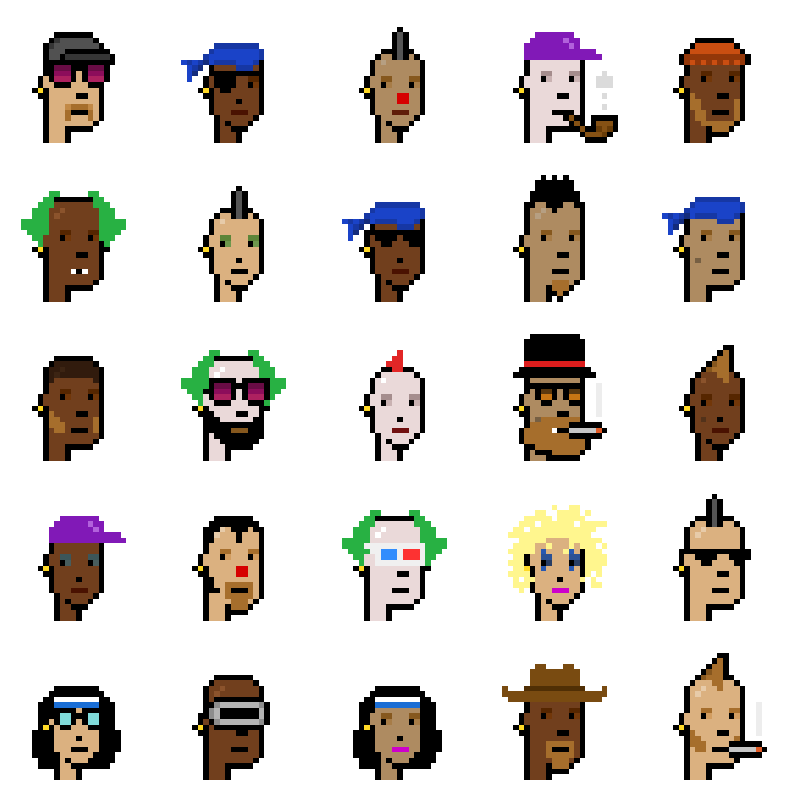

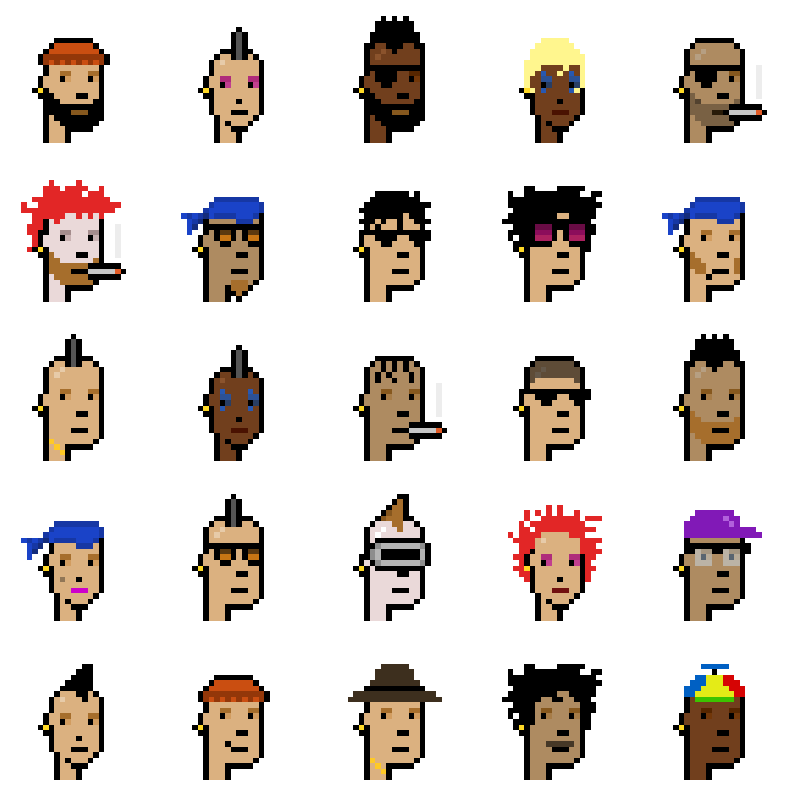

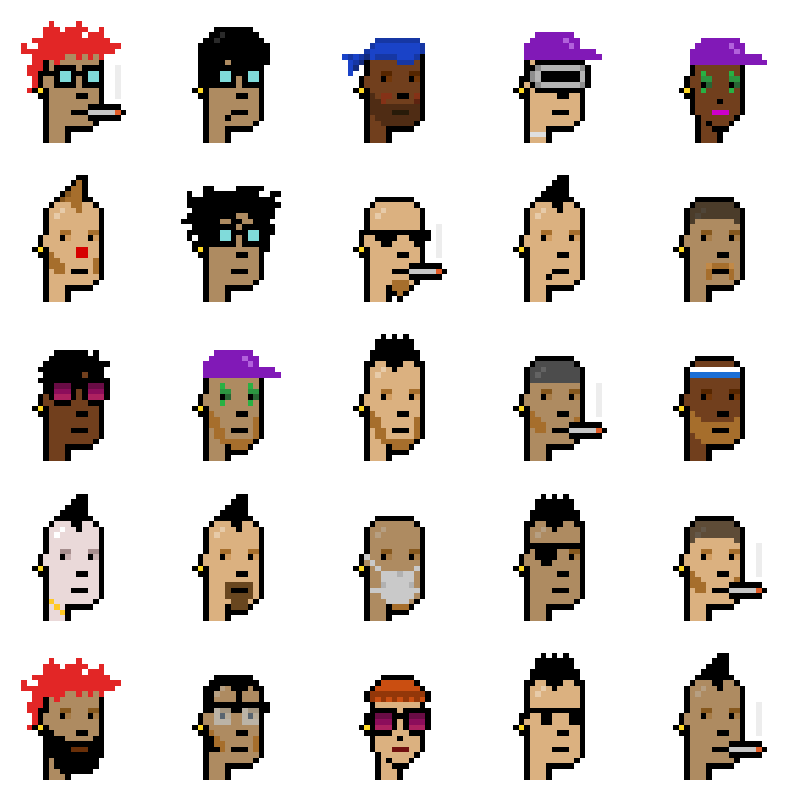

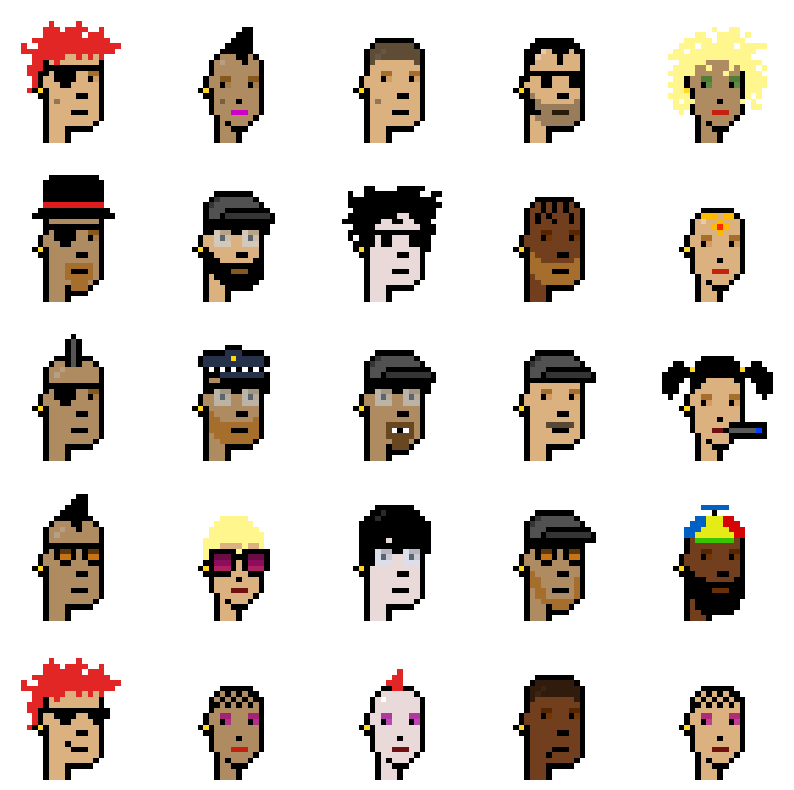

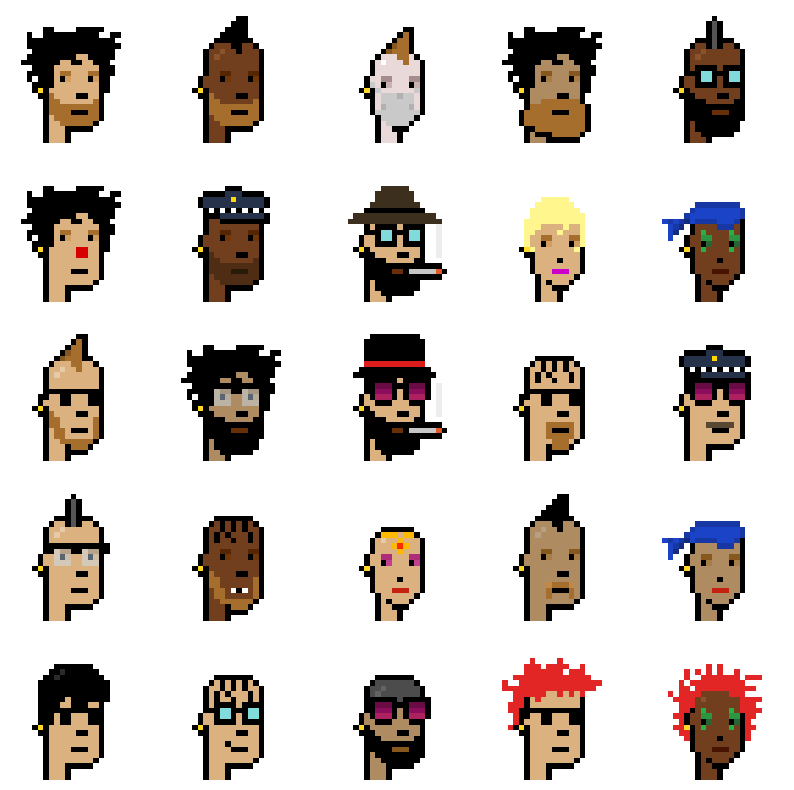

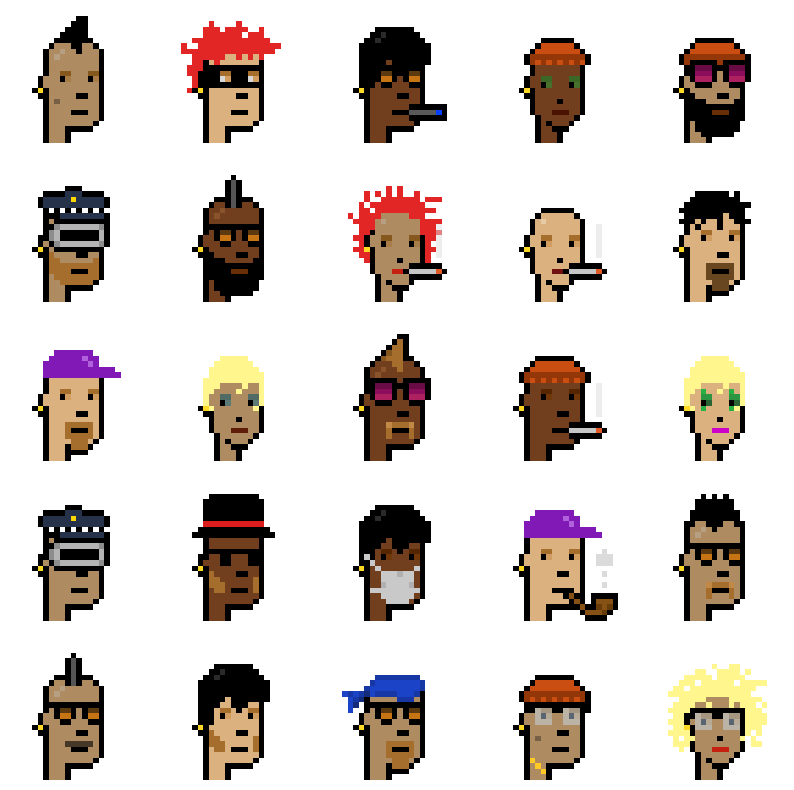

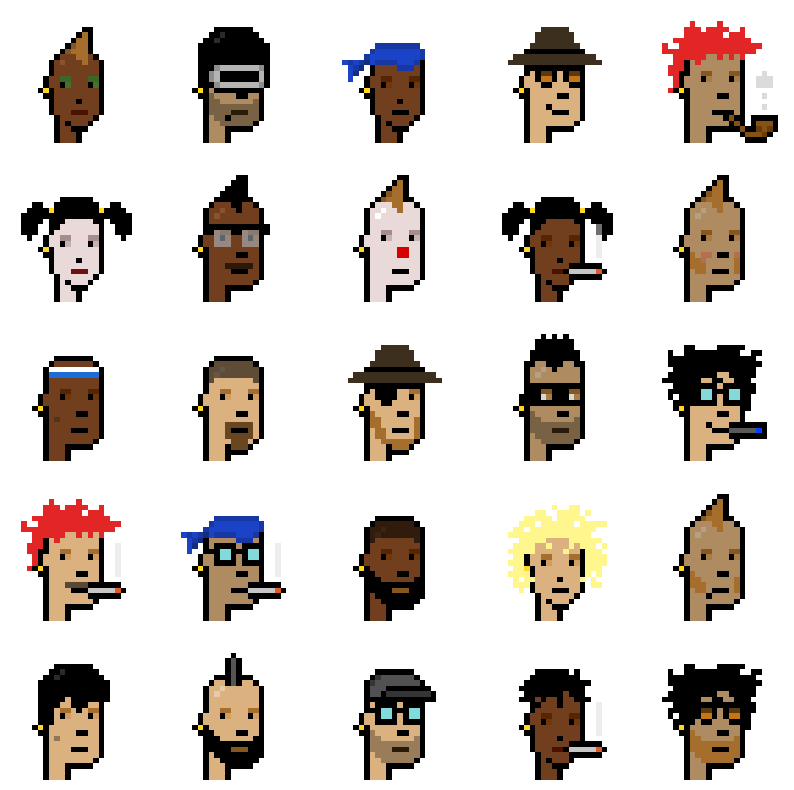

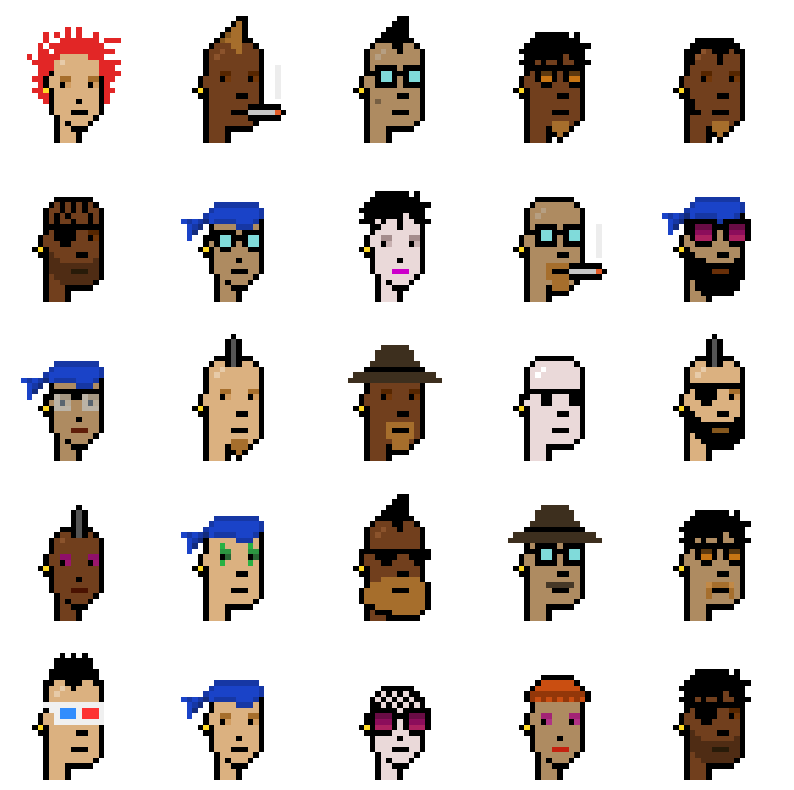

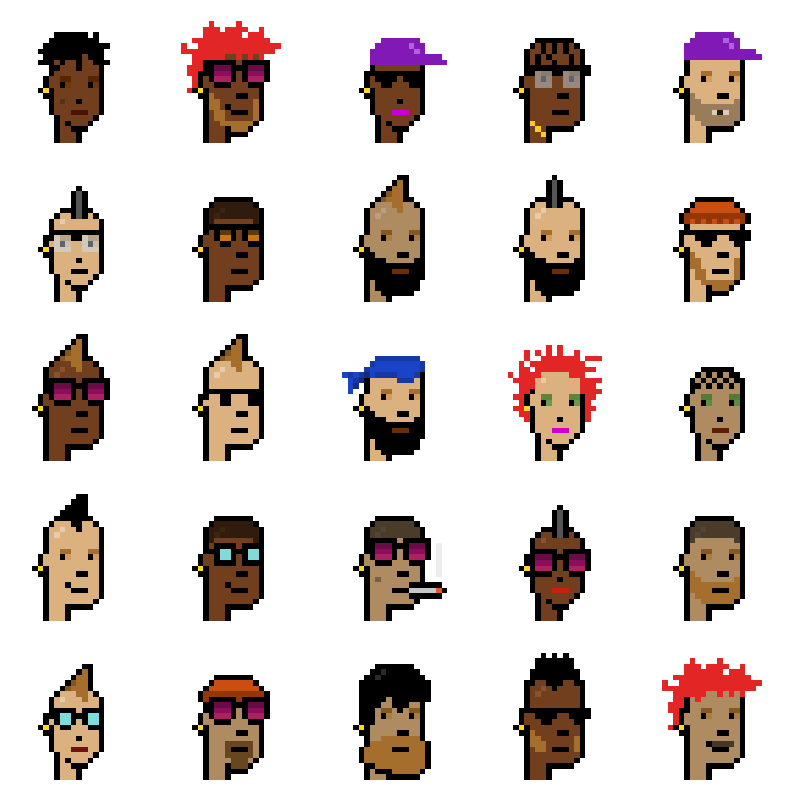

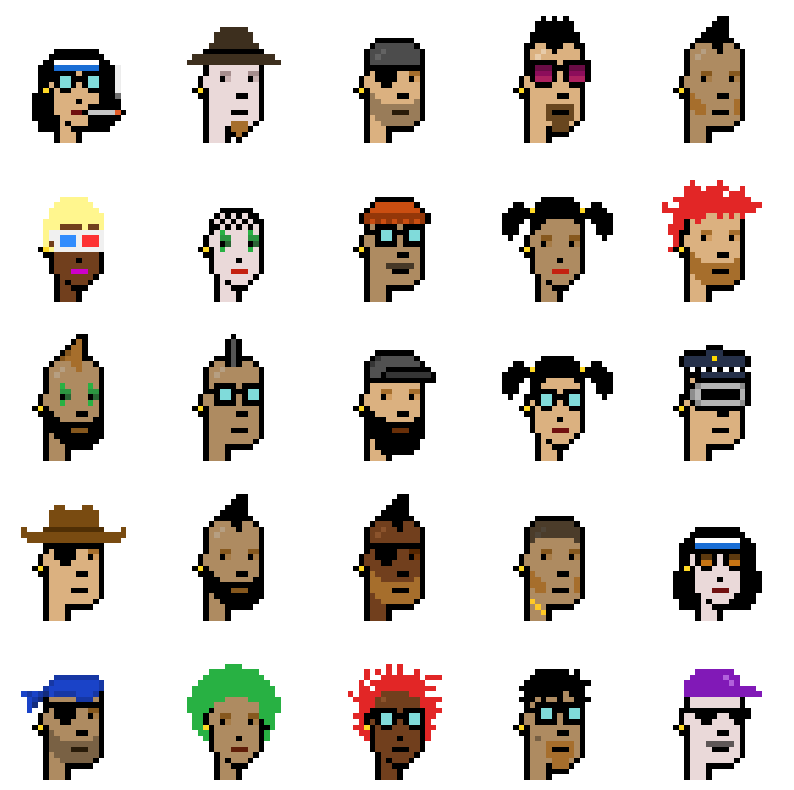

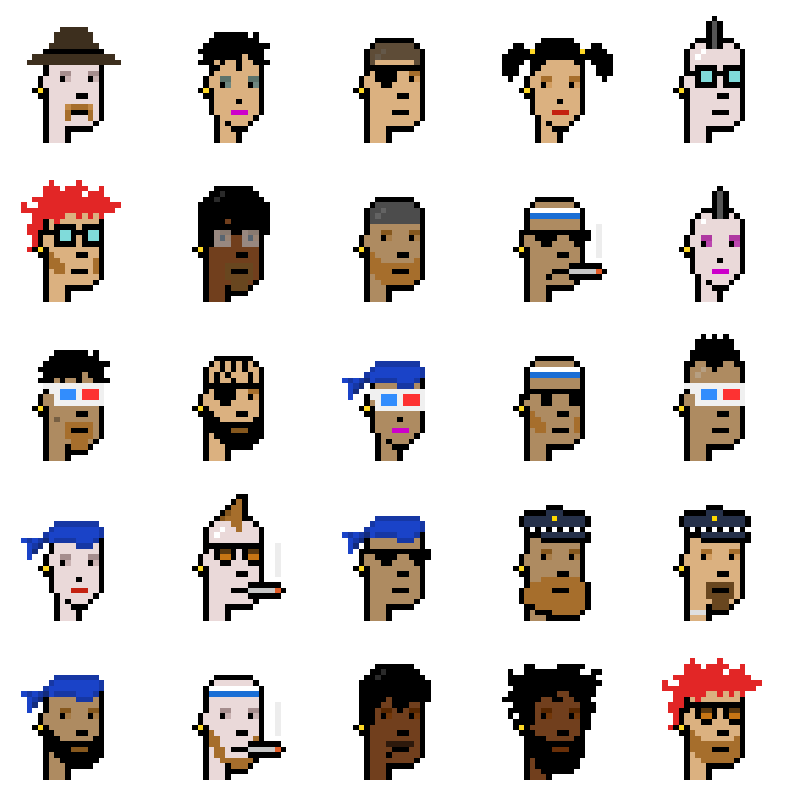

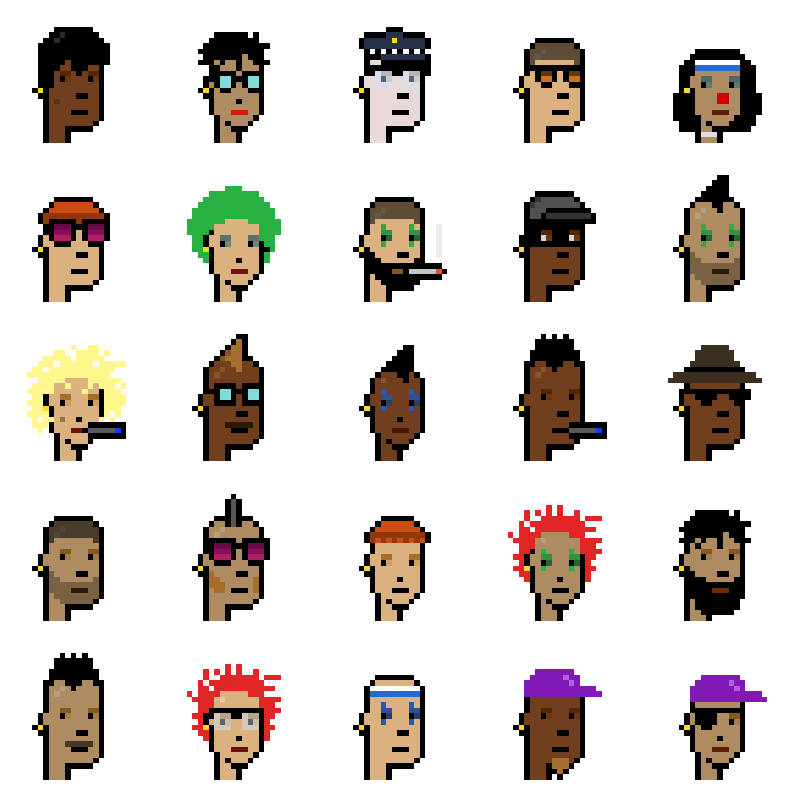

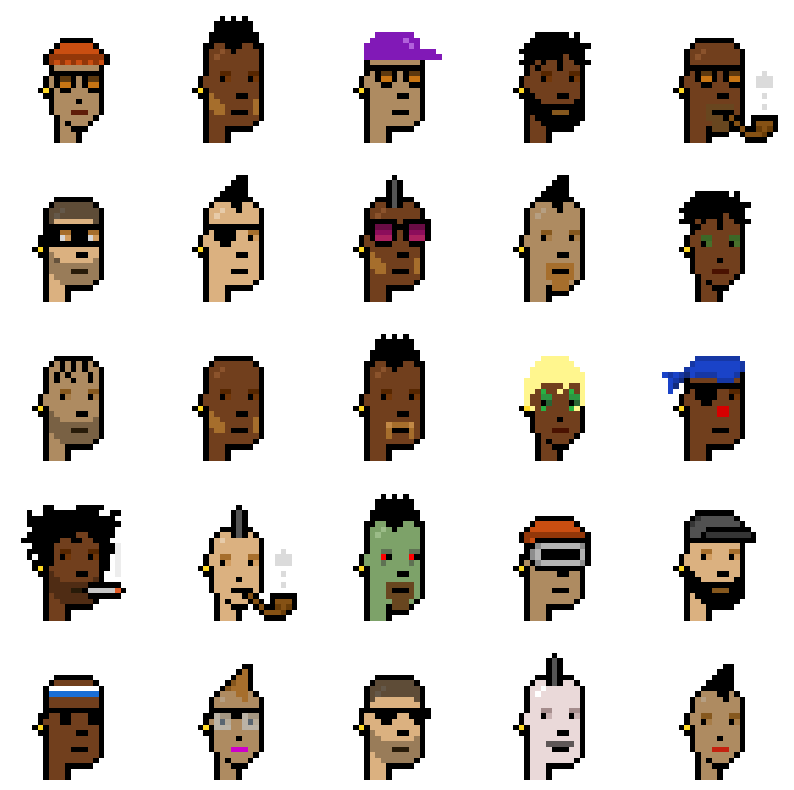

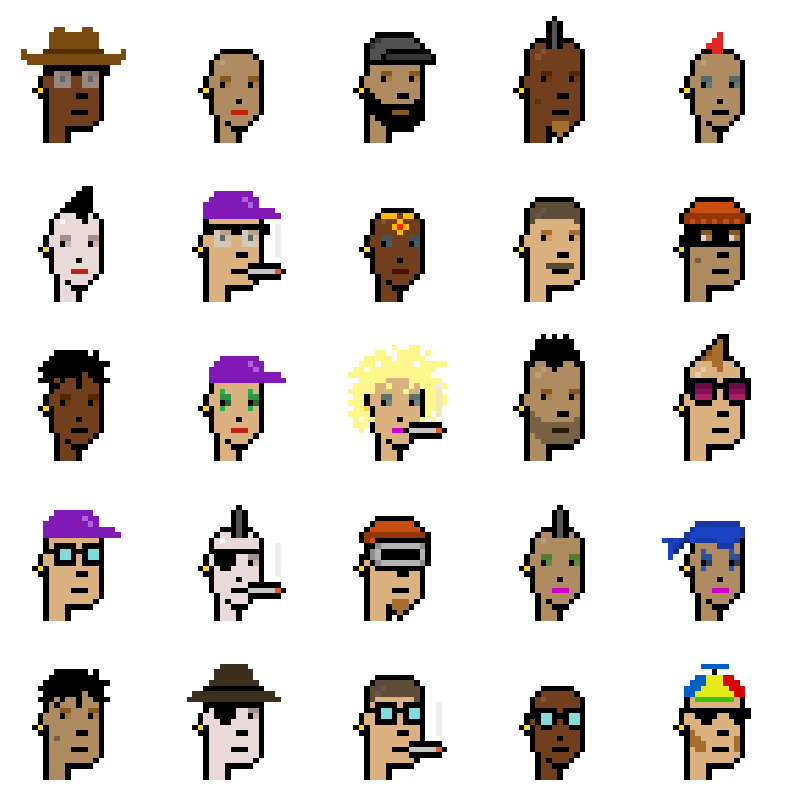

In [19]:
earring_imgs = [p for _, p in earring_matches]

page_size = 5
(x,y) = (page_size, page_size)
view_x, view_y = 2*x, 2*y
pages = len(earring_imgs) // (page_size*page_size)

for p in range(pages):
    fig = plt.figure(figsize=(view_x, view_y))
    for i,c in enumerate(earring_imgs[p*x*y:(p+1)*x*y]):
        fig.add_subplot(x, y, i+1)
        plt.imshow(to_pil_image(c))
        plt.axis('off')
    plt.show()


## Mislabeled Punks

We now have a function that can detect all images where the face has an earring. It should be possible to improve the quality of the _earrings_ label.

We'll create a set of the IDs labeled with earrings and a set of the IDs for images where we found an earring in the image itself.

From there, we can address both sides of false data:

1. **false positives**: set(all_earrings) - set(earring_matches)
2. **false negatives**: set(earring_matches) - set(all_earrings)

In [20]:
matched_ids = [idx for idx,_ in earring_matches]

false_positives = set(all_earrings) - set(matched_ids)
false_negatives = set(matched_ids) - set(all_earrings)

print(f"False positives: {len(false_positives)}")
print(f"False negatives: {len(false_negatives)}")

False positives: 483
False negatives: 0


## Warning

The cell below will plot all 483 faces that were labeled as having an earring, but do not have the golden pixels where an earring should be.

There are more cells below this huge section.

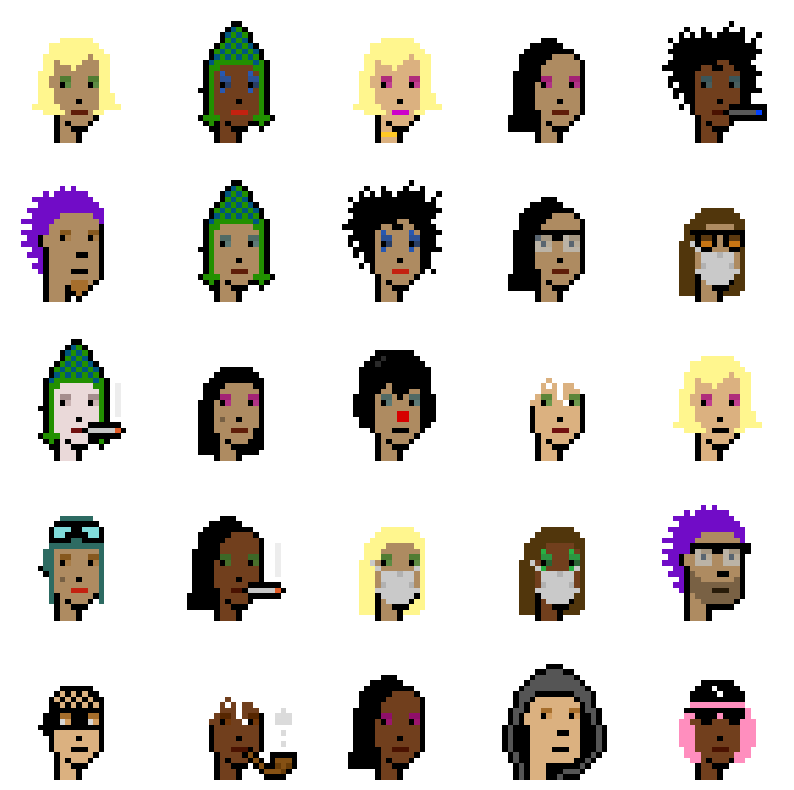

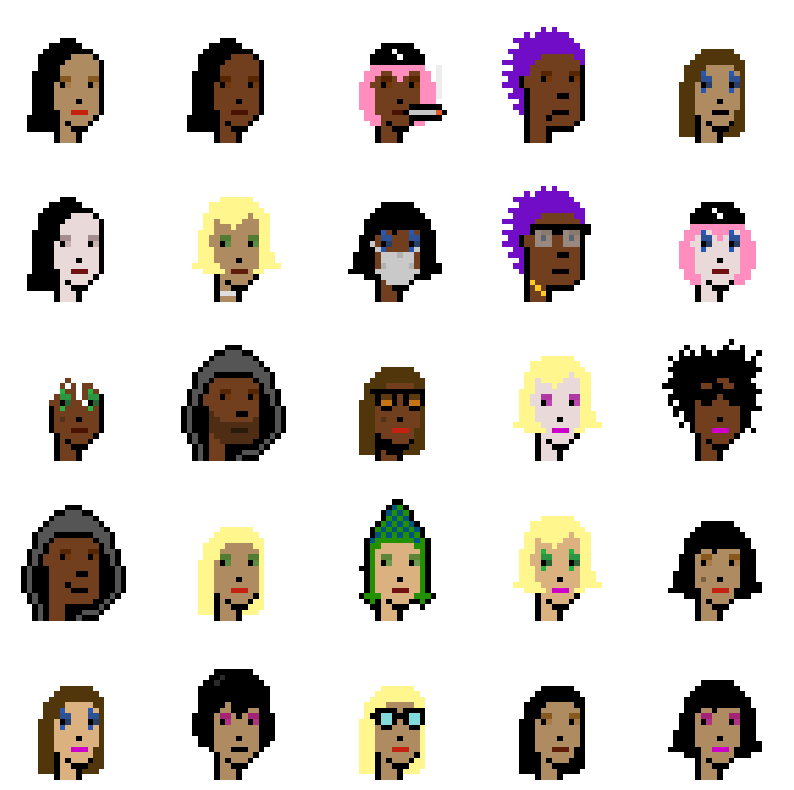

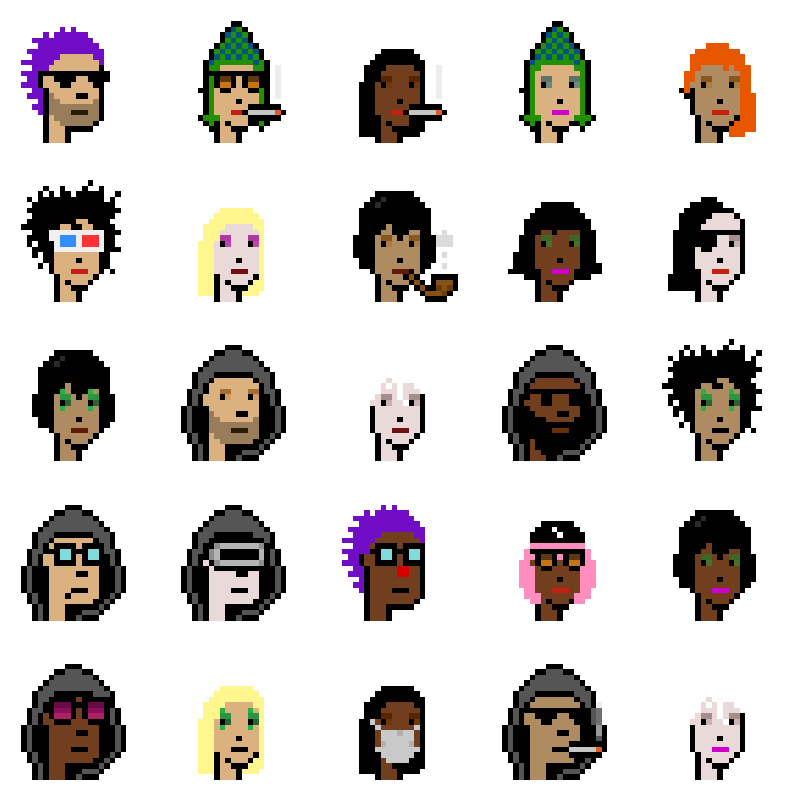

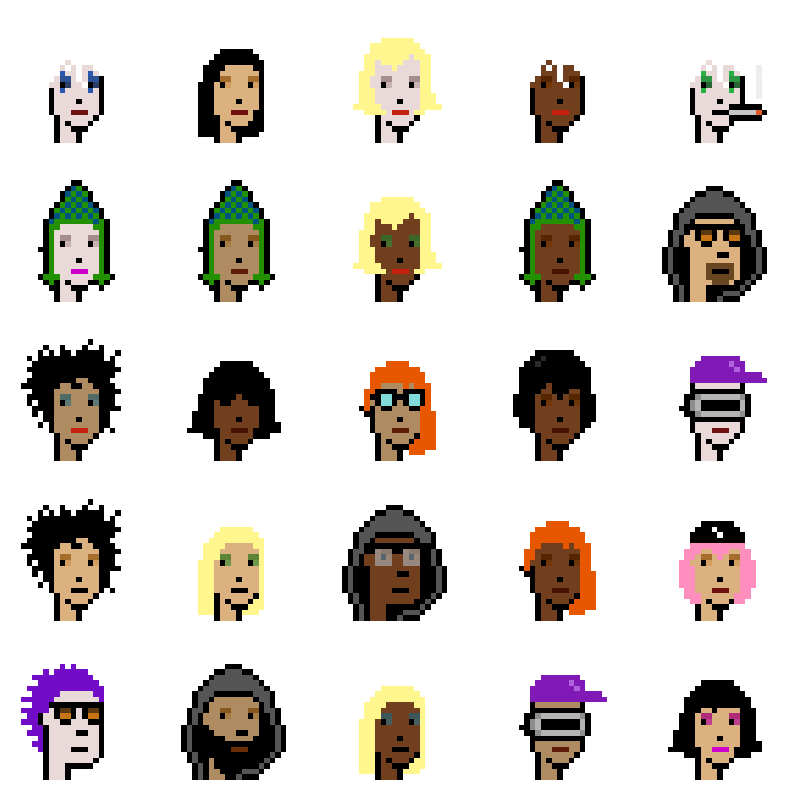

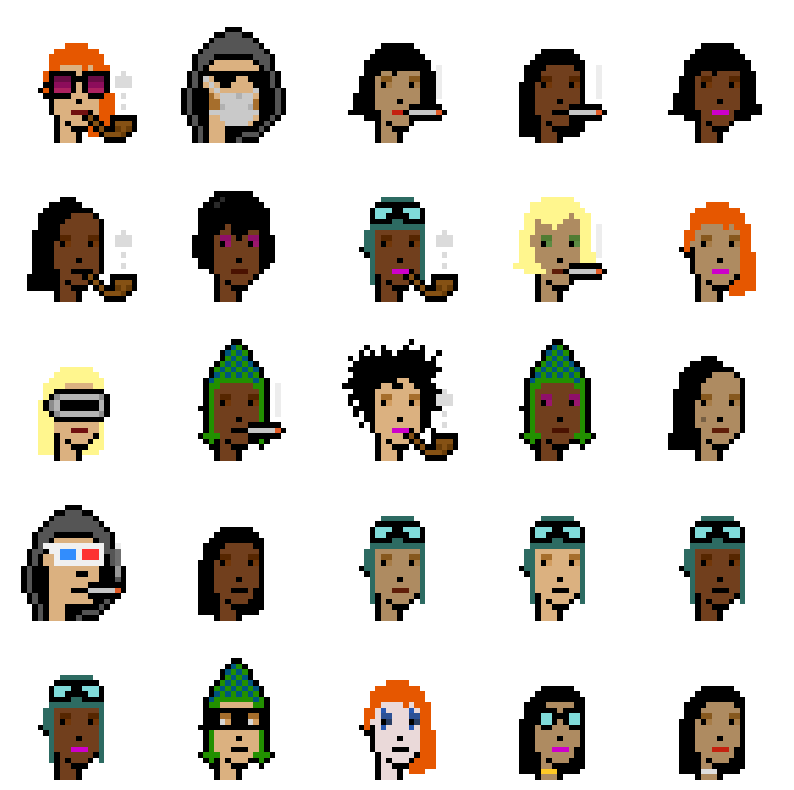

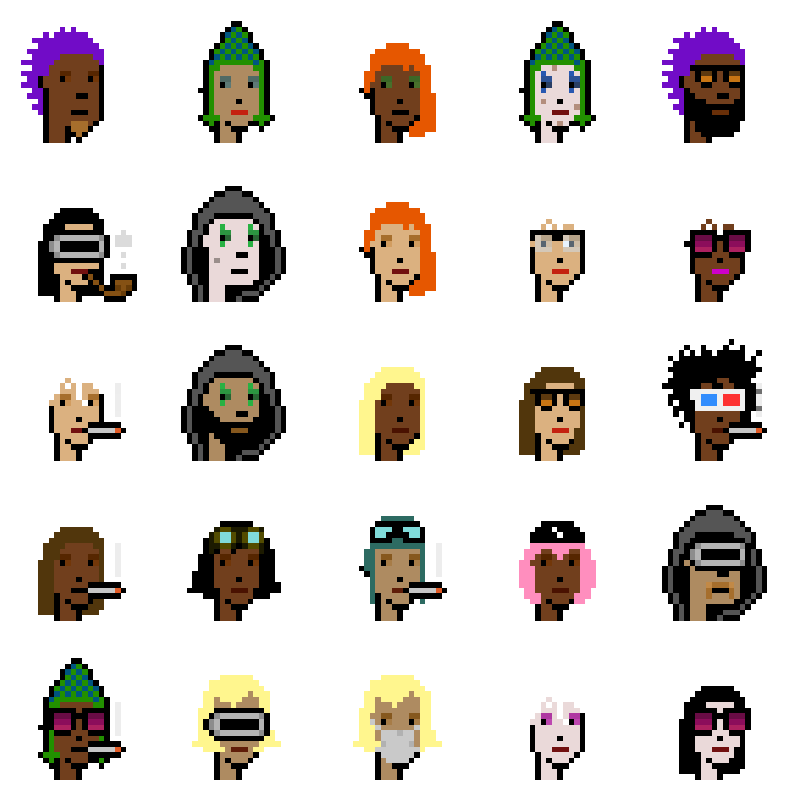

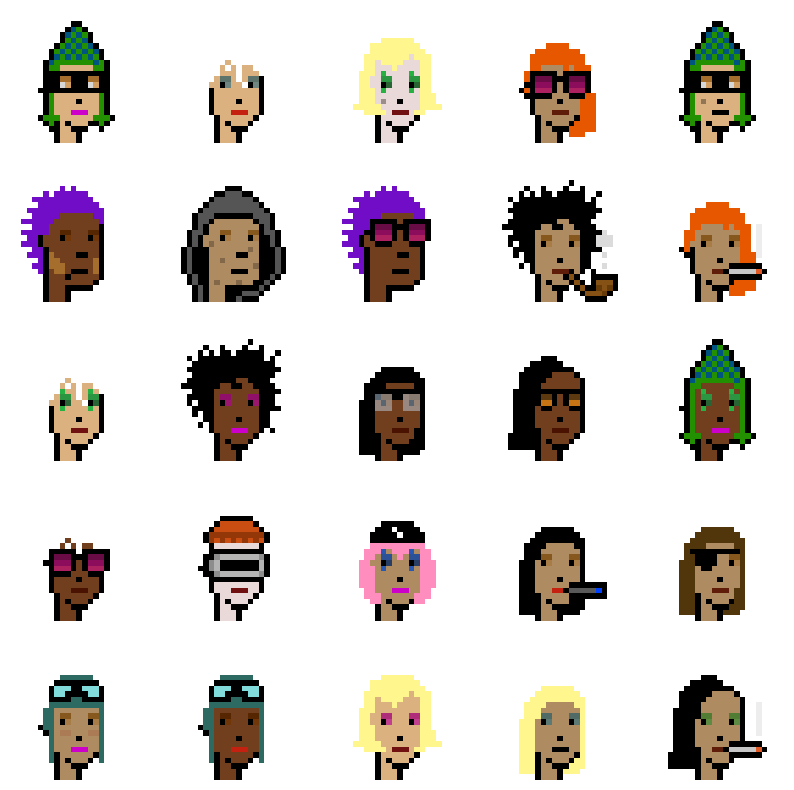

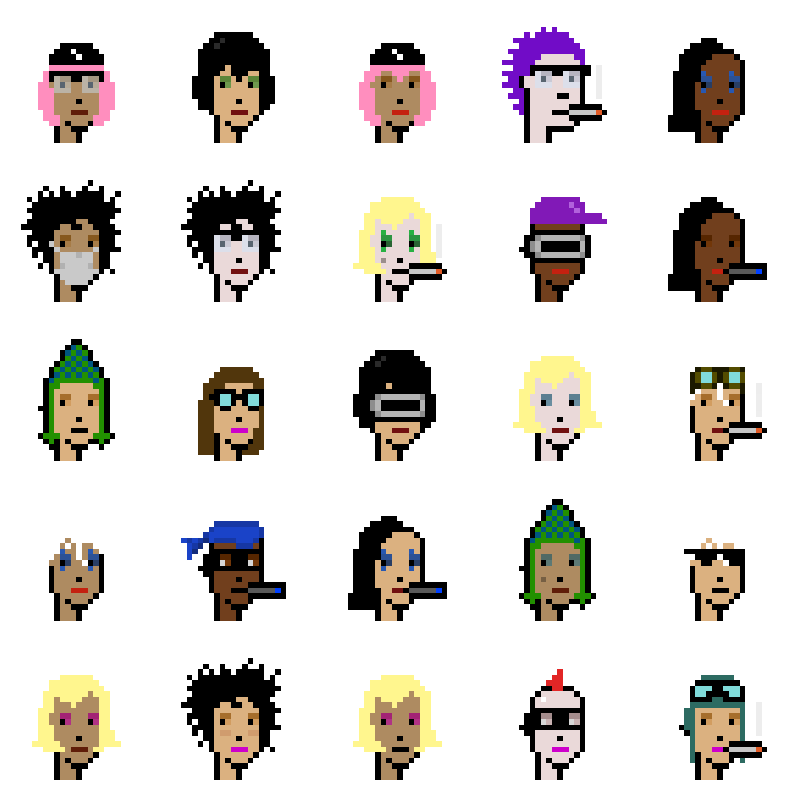

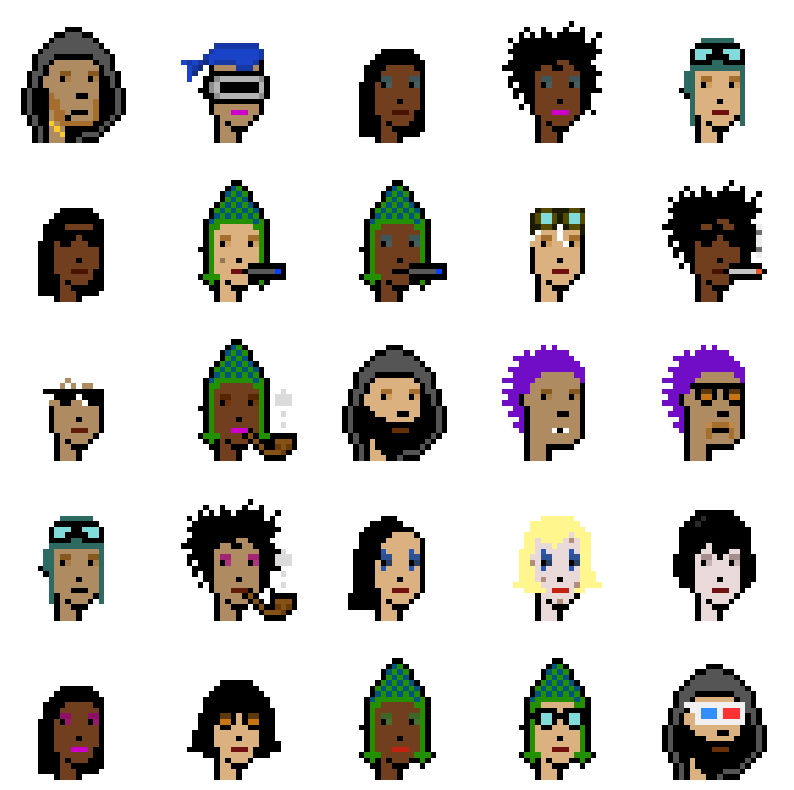

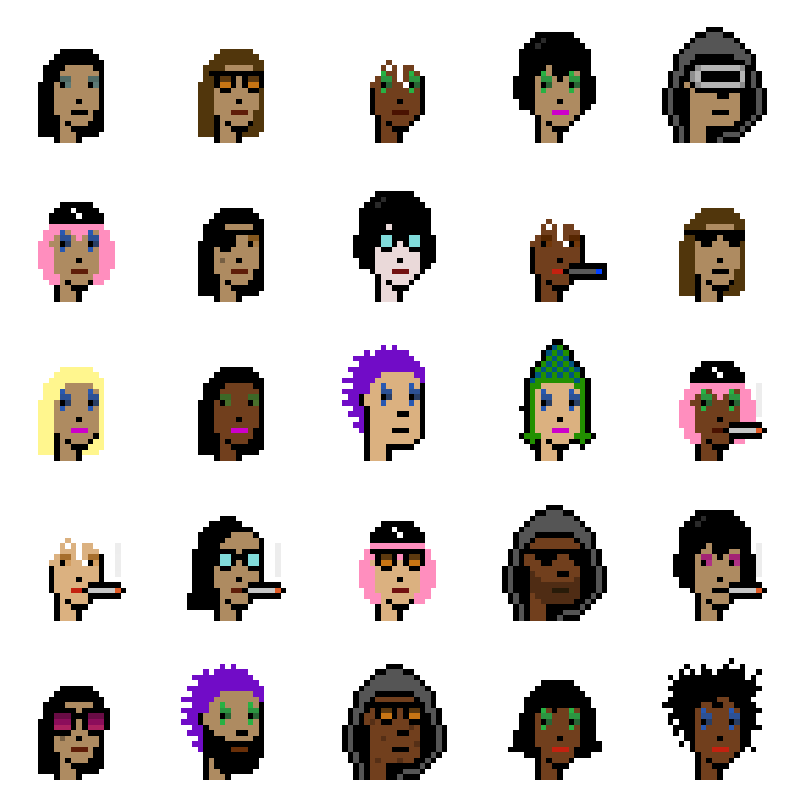

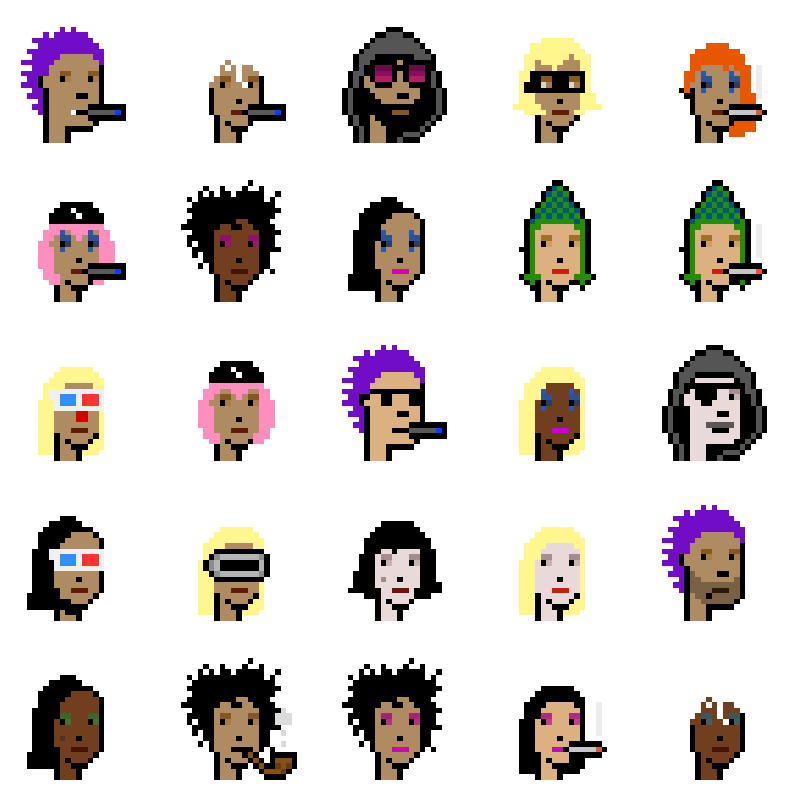

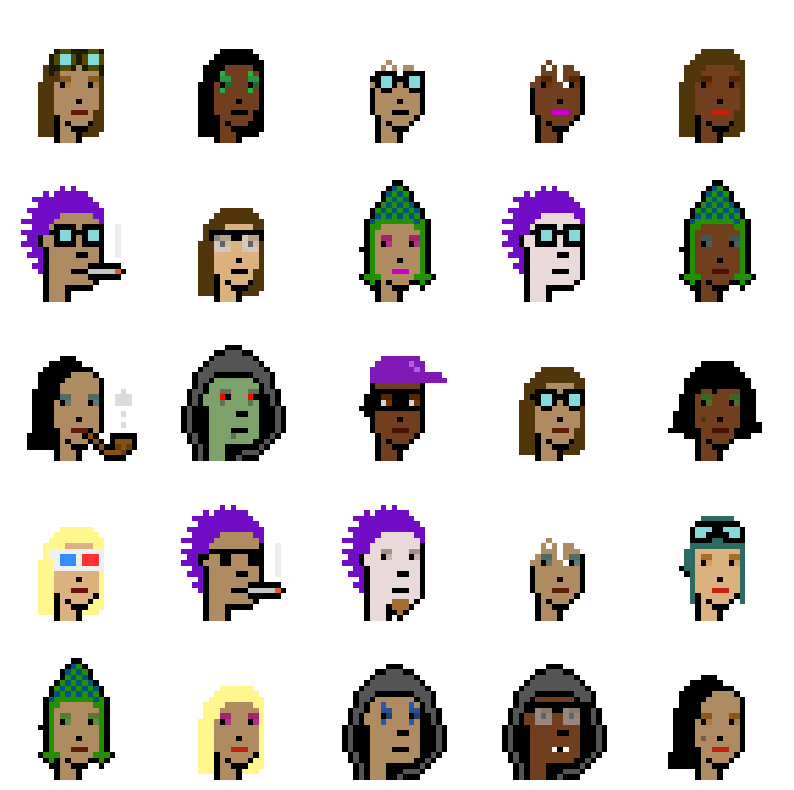

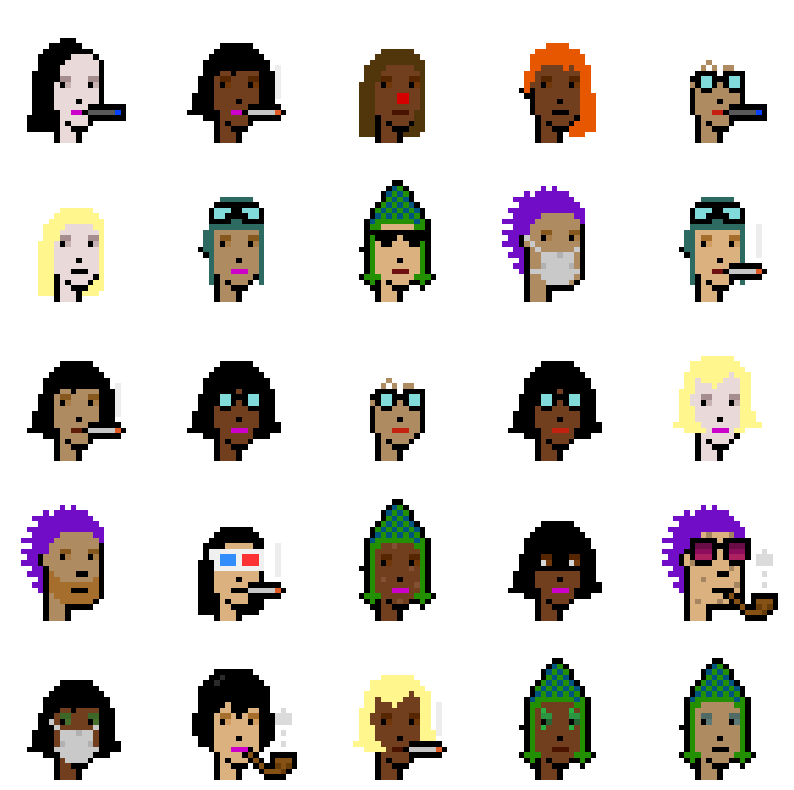

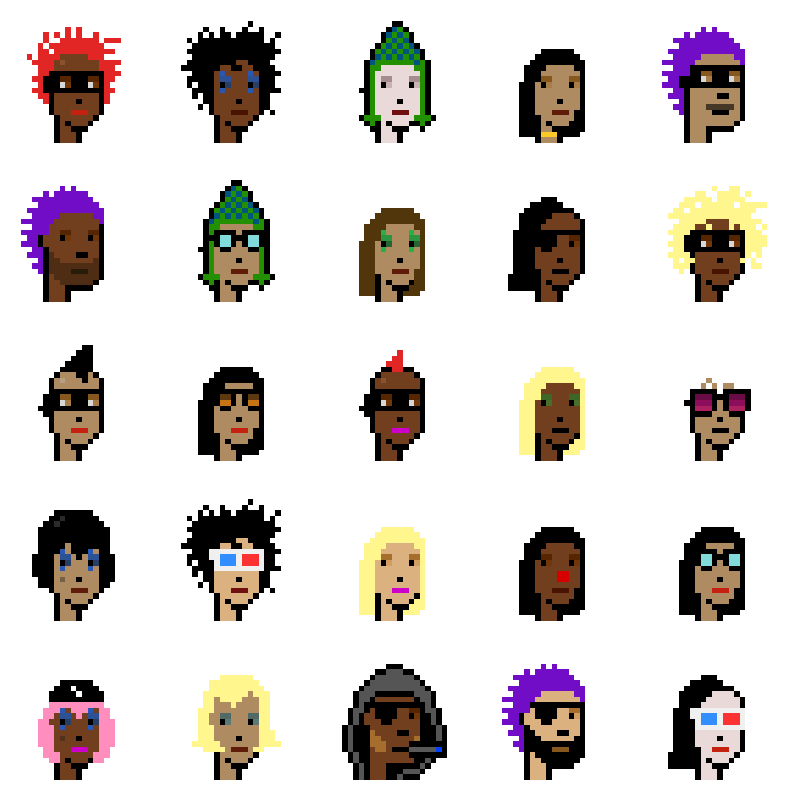

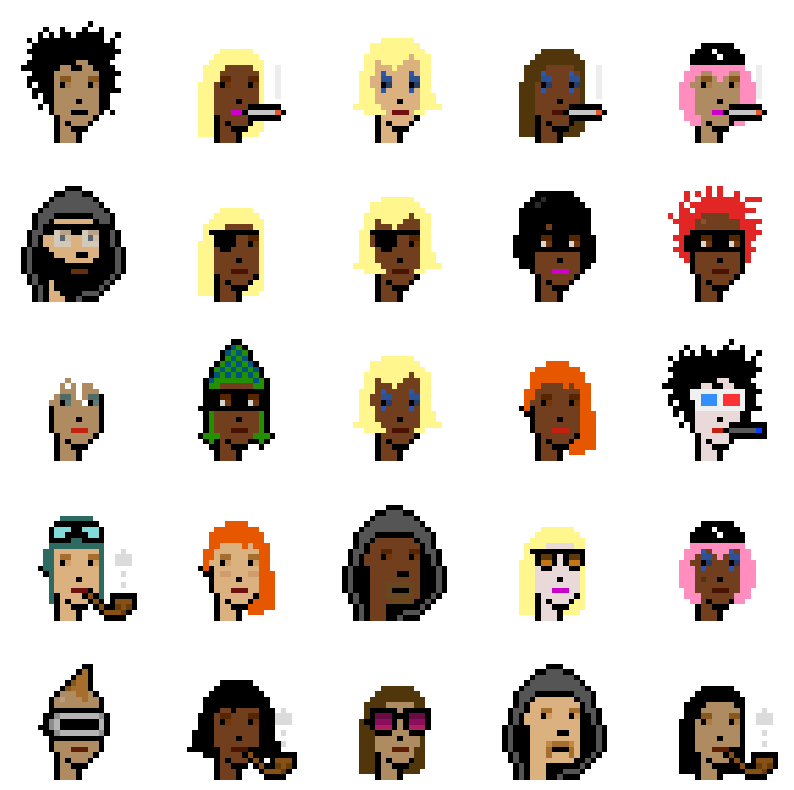

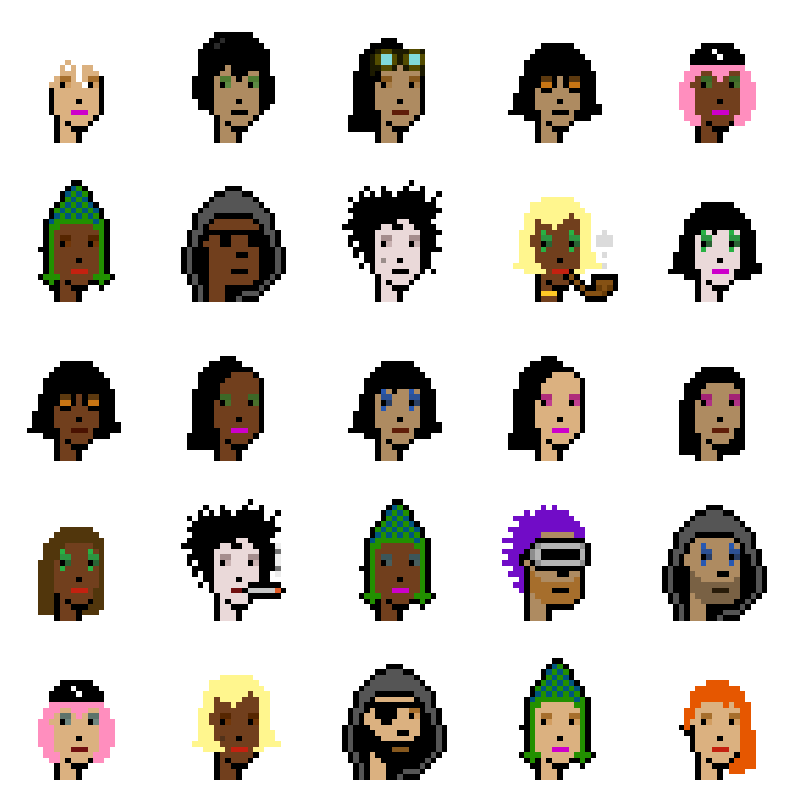

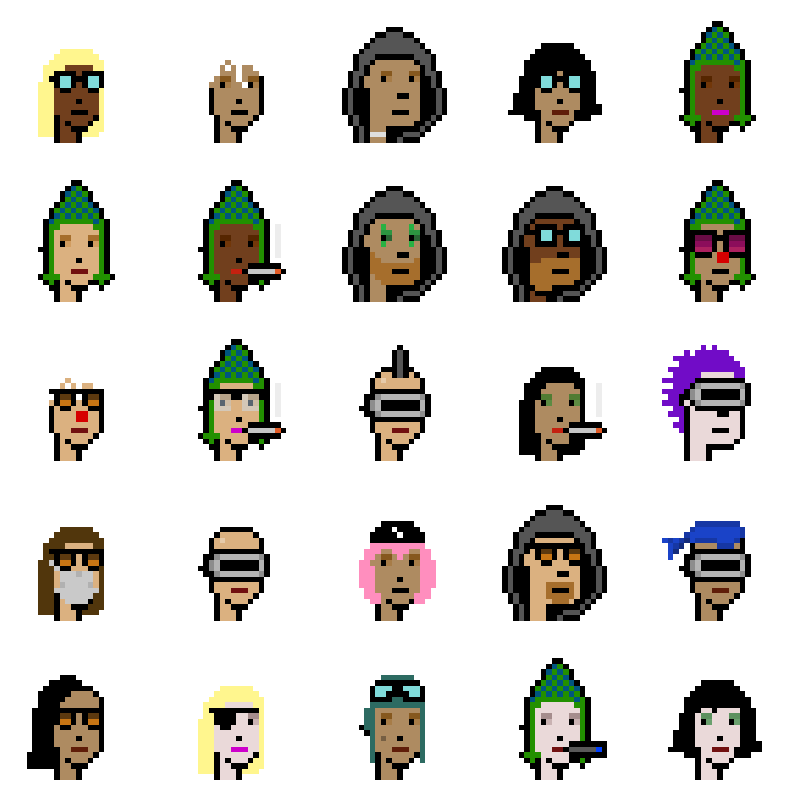

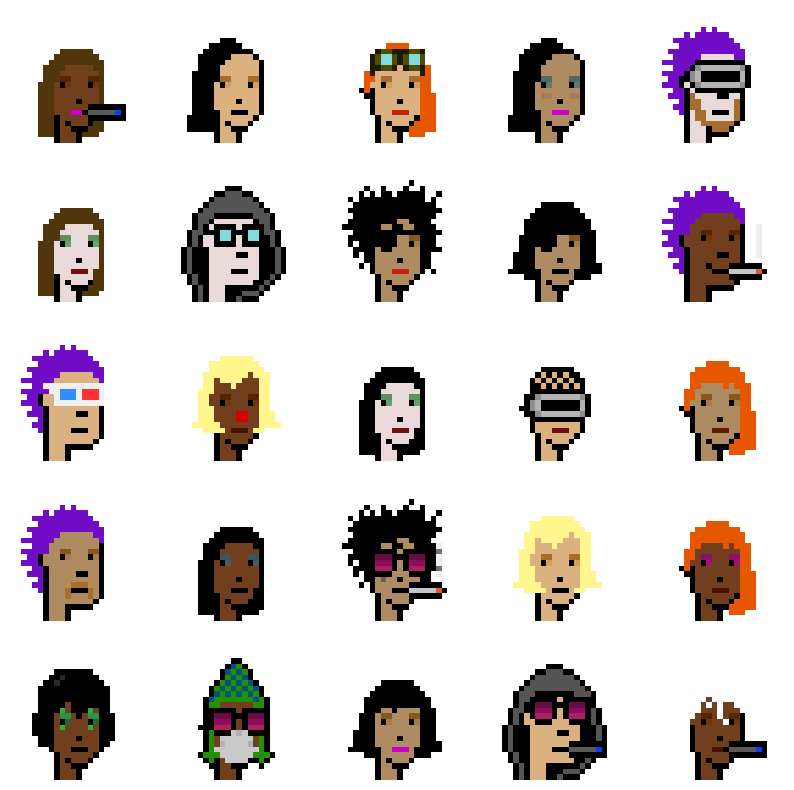

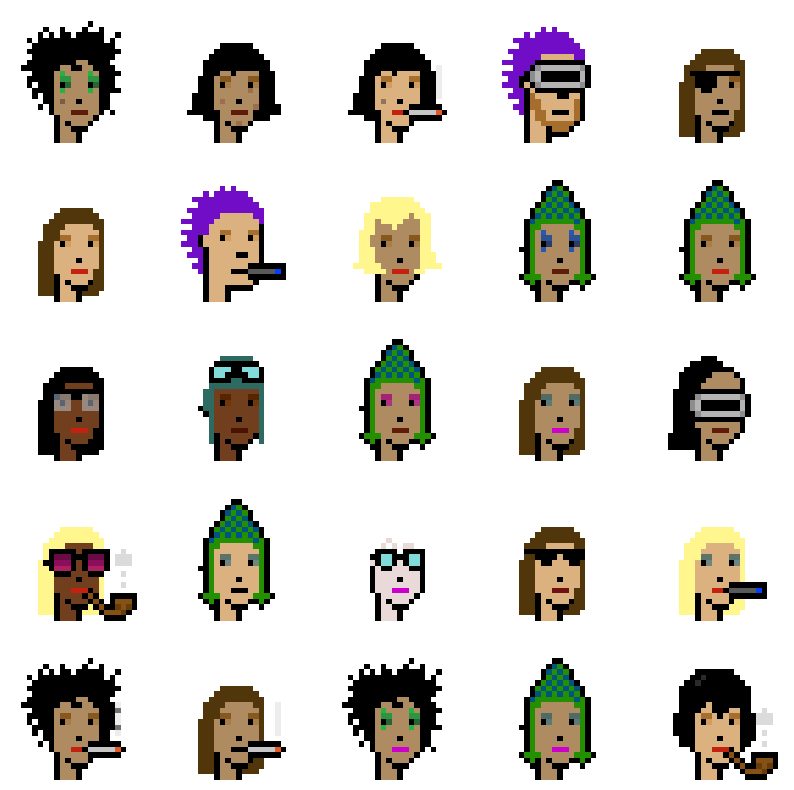

In [21]:
earring_imgs = [I.get_punk_tensor(i) for i in false_positives]

page_size = 5
(x,y) = (page_size, page_size)
view_x, view_y = 2*x, 2*y
pages = len(earring_imgs) // (page_size*page_size)

for p in range(pages):
    fig = plt.figure(figsize=(view_x, view_y))
    for i,c in enumerate(earring_imgs[p*x*y:(p+1)*x*y]):
        fig.add_subplot(x, y, i+1)
        plt.imshow(to_pil_image(c))
        plt.axis('off')
    plt.show()


# Custom Labels File

In [22]:
pallets_labels_file = '../scripts/pallets_labels.json'

# Flip the false positives
for fp in false_positives:
    cpunks10k_labels[str(fp)]['earring'] = 0


# There weren't any false negatives, but here it is
for fp in false_negatives:
    cpunks10k_labels[str(fp)]['earring'] = 1


# The CPunksDataset knows to prioritize this file, if it exists.
with open(pallets_labels_file, 'w') as f:
    pl = json.dumps(cpunks10k_labels)
    f.write(pl)


## Verify Changes in Dataset

In [23]:
# Load new labels and compare with previous labels

with open(pallets_labels_file, 'r') as f:
    fresh_punks_labels = json.loads(f.read())


new_positives = []
new_negatives = []
for idx in all_earrings:
    if fresh_punks_labels[str(idx)]['earring'] == 1:
        new_positives.append(idx)
    else:
        new_negatives.append(idx)


print(f"new positives {len(new_positives)}")
print(f"new negatives {len(new_negatives)}")

new positives 1976
new negatives 483


In [24]:
# Load a dataset so we can verify it contains the changes

from pallets import datasets as DS

logger = L.init_logger(level='INFO', notebook=True)
device = M.get_device(require_gpu=True)


all_colors = I.get_punk_colors()
mapper = DS.ColorOneHotMapper(all_colors)
dataset = DS.FastOneHotCPunksDataset(
    device, mapper, labels_file=pallets_labels_file, test_size=0
)



INFO | gpu: cuda
INFO | loading punk images
INFO | - image 0
INFO | - image 1000
INFO | - image 2000
INFO | - image 3000
INFO | - image 4000
INFO | - image 5000
INFO | - image 6000
INFO | - image 7000
INFO | - image 8000
INFO | - image 9000
INFO | punk images complete
INFO | loading punk labels: ../scripts/pallets_labels.json


In [25]:
earring_idx = list(cpunks10k_labels["0"].keys()).index("earring")

ds_earrings = []
for idx in new_positives:
    if dataset._labels[idx][earring_idx].item() == 1:
        ds_earrings.append(idx)

print(f"Positives match: {len(ds_earrings) == len(new_positives)}")

ds_earrings = []
for idx in new_negatives:
    if dataset._labels[idx][earring_idx].item() == 0:
        ds_earrings.append(idx)

print(f"Negatives match: {len(ds_earrings) == len(new_negatives)}")



Positives match: True
Negatives match: True
